# Machine Learning - Final Project

<u>Group 24</u>  
Itay Zohar - 205475593  
Amit Hadar - 318597721 

### Imports

In [106]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings('ignore')

# First Glance

In [107]:
data = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')
data.head()

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
0,0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,NaN,0
1,1,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,0.000000,0.200000,0.200000,...,4.0,safari_14,9.0,Returning_Visitor,False,c_3,113.358423,log404,NaN,0
2,2,0.0,0.0,0.0,NaN,NaN,627.5 minutes,627.500000,0.020000,0.050000,...,3.0,browser_3_v17,1.0,Returning_Visitor,True,c_4,121.507695,log202,NaN,0
3,3,0.0,0.0,0.0,0.0 minutes,19.0,154.2166667 minutes,154.216667,0.015789,0.024561,...,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_3,93.747176,log_100,NaN,0
4,4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,NaN,0


### Histrogram of all numeric values. Examining the density of the features.

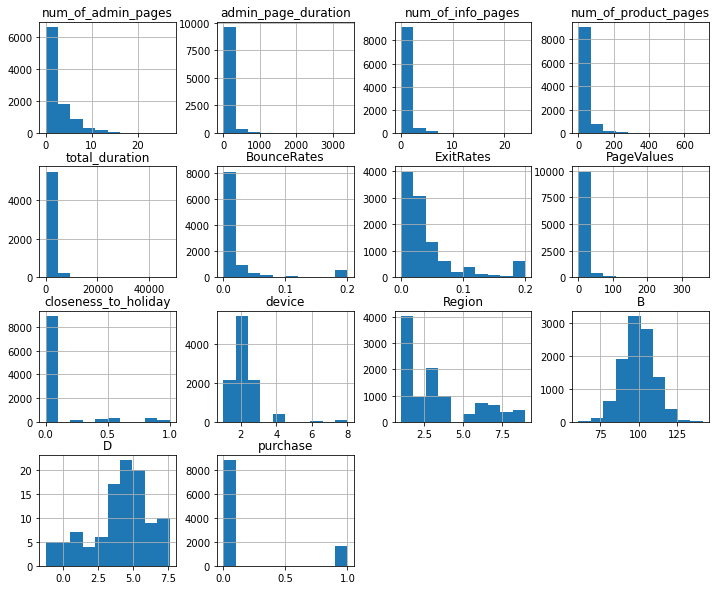

In [108]:
data.iloc[:,1:].hist(figsize=(12,10))
pass

### correlation matrix between all features

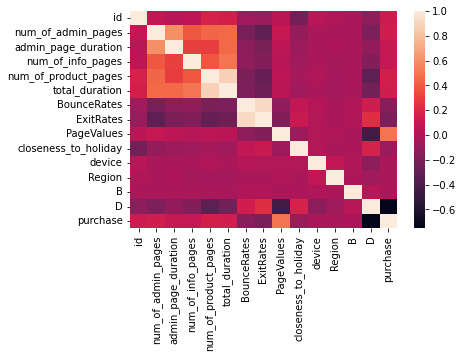

In [109]:
corr = data.corr()
sb.heatmap(corr)
pass

We can see from the heatmap that the durations are linked

# Exploration and Preprocessing  
Things we want to do:  
1. Split the data
2. Convert non-numeric features to numeric or dummies
3. Fill out missing values


## Splitting the data

In [110]:
Y = data.loc[:,'purchase'] 
X = data.iloc[:, :-1]

X_train, X_val, y_train, y_val = train_test_split(X, Y,test_size=0.8,random_state=23)

print('y value couns:\n',y_train.value_counts(), sep='')
del X, Y
X_train.head(5)


y value couns:
0    1768
1     327
Name: purchase, dtype: int64


,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,Month,device,internet_browser,Region,user_type,Weekend,A,B,C,D
2442,2442,0.0,0.000000,0.0,0.0 minutes,5.0,108.0 minutes,108.000000,0.000000,0.080000,...,May,2.0,chrome_90.1.7,3.0,Returning_Visitor,False,c_13,92.047040,log202,NaN
4138,4138,7.0,188.166667,0.0,0.0 minutes,52.0,1089.642857 minutes,1277.809524,0.003509,0.010234,...,May,2.0,browser_5_v19,6.0,Returning_Visitor,True,c_5,95.347227,log8080,NaN
8935,8935,7.0,133.466667,4.0,46.5 minutes,26.0,1357.833333 minutes,NaN,0.000000,0.018487,...,Nov,3.0,chrome_89,9.0,New_Visitor,True,c_2,87.950930,log202,NaN
3648,3648,4.0,259.000000,1.0,42.0 minutes,18.0,401.968254 minutes,NaN,0.000000,0.017105,...,May,1.0,safari_14,3.0,Returning_Visitor,False,c_3,109.345812,log404,NaN
10110,10110,1.0,153.500000,0.0,0.0 minutes,NaN,1002.847222 minutes,NaN,0.000000,0.009524,...,Nov,2.0,chrome_90.1.7,4.0,Returning_Visitor,False,c_2,117.950076,log200,NaN


In [111]:
print("** types: **")
print(X_train.dtypes)

print('\n** label values: **\n',y_train.value_counts())
print(f'purchased sessions are around {int((y_train.loc[y_train == 1].shape[0] / y_train.shape[0]) * 100)}% of all sessions')

** types: **
id                         int64
num_of_admin_pages       float64
admin_page_duration      float64
num_of_info_pages        float64
info_page_duration        object
num_of_product_pages     float64
product_page_duration     object
total_duration           float64
BounceRates              float64
ExitRates                float64
PageValues               float64
closeness_to_holiday     float64
Month                     object
device                   float64
internet_browser          object
Region                   float64
user_type                 object
Weekend                   object
A                         object
B                        float64
C                         object
D                        float64
dtype: object

** label values: **
 0    1768
1     327
Name: purchase, dtype: int64
purchased sessions are around 15% of all sessions


Next, we will handle the empty values in our data.  
For each feature we checked the missing values, and decided how to fill them.  
In general, we chose to fill empty values with the median or mean, depends if the feature incloudes fractional component or not.

## ID
We think that this feature is probelbly usless for us, so we decided to delete it.

In [112]:
def id_prep(X):
    X = X.drop(columns=['id'])
    return X

X_val = id_prep(X_val)
X_train = id_prep(X_train)
X_test = id_prep(X_test)


## page durations

#### turn all to numeric:

In [113]:
## convert to numeric

def page_durations_prep(X):
    fields = ['info_page_duration', 'product_page_duration']
    for field in fields:
        print(field, 'str structure:', X[field].value_counts().index[0])

        # make sure all durations are in minutes
        print('not minutes count: ', len(X.loc[~X[field].str.contains('minutes').astype('bool'),(field)]))
        print('nan count: ', X[field].isnull().sum())

        # convert to float `type(d)==str ` handles nan values
        X[field] = [float(d.split()[0]) if type(d) is str else np.nan for d in X[field]]

        print('new types:')
        X.dtypes[fields]

    return X

print('train:')
X_train = page_durations_prep(X_train)
print('validation:')
X_val = page_durations_prep(X_val)
print('test:')
X_test = page_durations_prep(X_test)

train:
info_page_duration str structure: 0.0 minutes
not minutes count:  0
nan count:  58
new types:
product_page_duration str structure: 0.0 minutes
not minutes count:  0
nan count:  136
new types:
validation:
info_page_duration str structure: 0.0 minutes
not minutes count:  0
nan count:  259
new types:
product_page_duration str structure: 0.0 minutes
not minutes count:  0
nan count:  485
new types:
test:
info_page_duration str structure: 0.0 minutes
not minutes count:  0
nan count:  64
new types:
product_page_duration str structure: 0.0 minutes
not minutes count:  0
nan count:  113
new types:


#### fill missing values with a "smart average". see paper appendix for details

In [114]:
## fill missing vlaues
avgs = None

def page_durations_fill_na(X):
    global avgs
    avg_time_in_admin_page = (X_train.admin_page_duration / X_train.num_of_admin_pages).mean()
    avg_time_in_info_page = (X_train.info_page_duration / X_train.num_of_info_pages).mean()
    avg_time_in_product_page = (X_train.product_page_duration / X_train.num_of_product_pages).mean()

    avgs = (avg_time_in_info_page, avg_time_in_product_page, avg_time_in_admin_page)
    duration_fields = ('info_page_duration', 'product_page_duration', 'admin_page_duration')
    num_of_fields = ('num_of_info_pages', 'num_of_product_pages','num_of_admin_pages')
    for i, field in enumerate(duration_fields):        
        num_of_field_copy = X[num_of_fields[i]].copy()
        num_of_field_copy = num_of_field_copy.fillna(num_of_field_copy.mean())
        X.loc[X[field].isna(), field] = avgs[i] * num_of_field_copy.loc[X[field].isna()]
    return X

X_train = page_durations_fill_na(X_train)
X_val = page_durations_fill_na(X_val)
X_test = page_durations_fill_na(X_test)

## total durations
On the one hand `total duration` has many nan values, on the other hand it is easy enough to calculate it. So we decided to keep it and fill the nans

In [115]:

def total_druation_data_prep(X):
    ## total duration
    computed_durations = X.admin_page_duration + X.info_page_duration + X.product_page_duration
    X.total_duration = X.total_duration.fillna(computed_durations)
    return X

X_train = total_druation_data_prep(X_train)
X_val = total_druation_data_prep(X_val)
X_test = total_druation_data_prep(X_test)

In [116]:
X_train.info_page_duration.loc[X_train.info_page_duration.isnull()]

Series([], Name: info_page_duration, dtype: float64)

## num of page visits

#### turn values to numeric, and fill empty values with another "smart average" (details in papaer appendix)

In [117]:
# fill missing values

def num_of_visits_data_prep(X: pd.DataFrame):
    global avgs
    duration_fields = ('info_page_duration', 'product_page_duration', 'admin_page_duration')
    num_of_fields = ('num_of_info_pages', 'num_of_product_pages','num_of_admin_pages')
    for i, field in enumerate(num_of_fields):
        X.loc[X[field].isna(), field] = [ int(value / avgs[i]) for value in X.loc[X[field].isna(), duration_fields[i]]]
    return X


X_train = num_of_visits_data_prep(X_train)
X_val = num_of_visits_data_prep(X_val)
X_test = num_of_visits_data_prep(X_test)

## user type
user type has mainly two values, `New_Visitor` and  `Returning_Visitor`.
We wanted to see if we can map it to a binary feature.
For this, we:
1. made sure that `nan` and `other` are very rare
2. made sure there is no strong correlation between `other` and the label or featrue.

In [118]:
# check values
vc = X_train.user_type.value_counts()
nan_count = X_train.user_type.isnull().sum()
print('original user type values:\n', vc)
print('nan count        :', nan_count)
print('\n`other` categoryh is only ', f"{round(vc['Other'] / X_train.shape[0] * 100, 2)}%", 'of the data')
print('`Returning_Visitor` categoryh is ', f"{round(vc['Returning_Visitor'] / X_train.shape[0] * 100, 2)}%", 'of the data')
print('nan values are only ', f"{round(nan_count / X_train.shape[0] * 100, 2)}%", 'of the data')

original user type values:
 Returning_Visitor    1781
New_Visitor           290
Other                  17
Name: user_type, dtype: int64
nan count        : 7

`other` categoryh is only  0.81% of the data
`Returning_Visitor` categoryh is  85.01% of the data
nan values are only  0.33% of the data


### explore correlations betwenn user type and other features

In [119]:
X_train_user_dummy = pd.get_dummies(X_train,columns=['user_type'], prefix_sep='_dmy_', drop_first=False)
user_type_col_index = X_train.columns.get_loc('user_type')

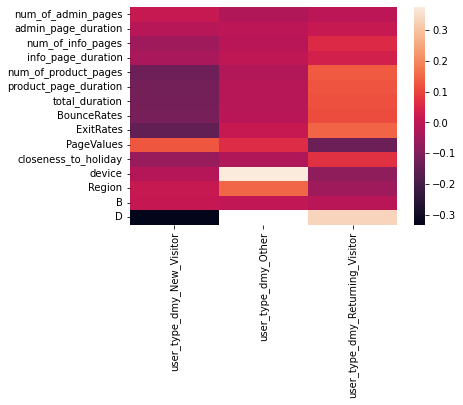

In [120]:
sb.heatmap(X_train_user_dummy.corr()[user_type_col_index:user_type_col_index+4].T[:user_type_col_index])
pass

### explore the link between `other` user type and `devices`

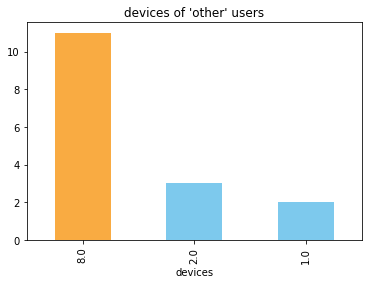

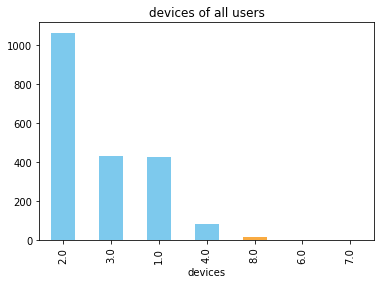

In [121]:
X_train.loc[X_train.user_type == 'Other', ('device')].value_counts().plot.bar(color=['#F9AB42']+['#7DC9ED']*2,
 title="devices of 'other' users", xlabel='devices')
plt.show()
devices_all = X_train.device.value_counts()
i = np.where(devices_all.index == 8.0)[0][0]
clrs = ['#7DC9ED']*7
clrs[i] = "#F9AB42"
devices_all.plot.bar(color=clrs,
 title="devices of all users", xlabel='devices')
plt.show()

### user_type - conclusion
two interesting correlartion here:  
a. `device` and `Other`:   
altough device 8 is very rare, almost all of device 8 sessions are `other`.  
It may mean that device 8 has some bug when collecing `user_type` data. However for our purpose it is not helpful (We were looking for a way to turn "other" to one of the other two.)  
b. `D`. but since `D` is mostly missing values, We shall treat `user type` as binary: only new users (0) and returing users (1)

In [122]:
#  map 'Returning_Visitor' , missing value and  'other' to 1, and New_Visitor to 0

def user_type_data_prep(X):
    RETURNING ='Returning_Visitor'
    X.user_type = [1 if u_type == RETURNING else 0 for u_type in X.user_type] 
    return X

X_train = user_type_data_prep(X_train)
X_val = user_type_data_prep(X_val)
X_test = user_type_data_prep(X_test)

## D feature
D's seem to have mostly nan values.  
If it's lower than 10%, we will remove it altogether.

In [123]:
valid_ds = X_train.loc[~np.isnan(X_train.D)]
print('only', str((valid_ds.shape[0] / X_train.shape[0]) * 100)[:3], "% of D's have values")

def d_data_prep(X):
    # remove D feature        
    return X.drop(columns=('D'))
del valid_ds

X_train = d_data_prep(X_train)
X_val = d_data_prep(X_val)
X_test = d_data_prep(X_test)

only 0.9 % of D's have values


## Bounce rate,  Exit rate, Page value
fill N/A with simple mean.

In [124]:
print('BounceRates nan count:', X_train.BounceRates.isnull().sum())
print('ExitRates nan count:', X_train.ExitRates.isnull().sum())
print('page values nan count:', X_train.PageValues.isnull().sum())

def rates_page_value_data_prep(X):    
    # so little nan values - lets fill with mean
    X.BounceRates = X.BounceRates.fillna(X_train.BounceRates.mean())
    X.ExitRates = X.ExitRates.fillna(X_train.ExitRates.mean())
    X.PageValues = X.PageValues.fillna(X_train.PageValues.mean())
    return X


X_train = rates_page_value_data_prep(X_train)
X_val= rates_page_value_data_prep(X_val)
X_test = rates_page_value_data_prep(X_test)

BounceRates nan count: 5
ExitRates nan count: 3
page values nan count: 6


In [125]:
print('BounceRates nan count after filling:', X_train.BounceRates.isnull().sum())
print('ExitRates nan count after filling:', X_train.ExitRates.isnull().sum())
print('page values nan count after filling:', X_train.PageValues.isnull().sum())

BounceRates nan count after filling: 0
ExitRates nan count after filling: 0
page values nan count after filling: 0


## closeness to holiday


In [126]:
print('closeness_to_holiday nan caount:', X_train.closeness_to_holiday.isnull().sum())


closeness_to_holiday nan caount: 85


### To fill the null values, we will try to find any correlataions between this feature and the others.

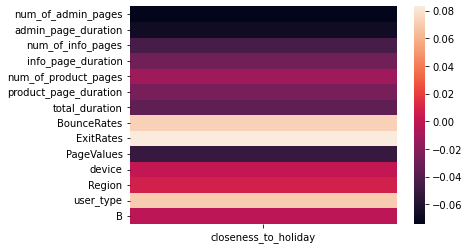

In [127]:
corr = X_train.corr()
col_index = X_train.columns.get_loc('closeness_to_holiday')
sb.heatmap(corr.iloc[col_index:col_index+1].T[corr.columns != 'closeness_to_holiday'])
pass

### the corrlation with ExitRates and BounceRates are due to closeness being mainly zeros
we will show this in the following graphs

Text(0, 0.5, 'ExitRates')

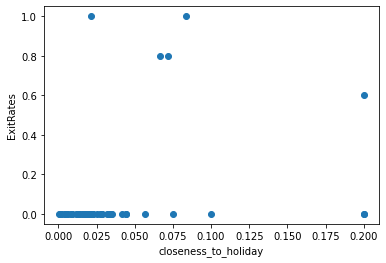

In [128]:
a = X_train.loc[:,X_train.columns.isin(['closeness_to_holiday', 'ExitRates'])].sample(50)
plt.scatter(a.iloc[:,0], a.iloc[:,1])
plt.xlabel('closeness_to_holiday')
plt.ylabel('ExitRates')

Text(0, 0.5, 'BounceRates')

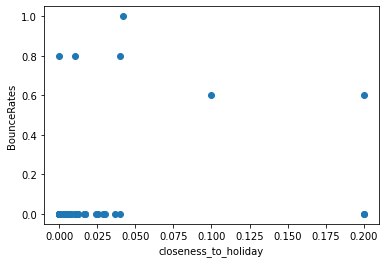

In [129]:
a = X_train.loc[:,X_train.columns.isin(['closeness_to_holiday', 'BounceRates'])].sample(50)
plt.scatter(a.iloc[:,0], a.iloc[:,1])
plt.xlabel('closeness_to_holiday')
plt.ylabel('BounceRates')

### see distribution of clossness to holiday values

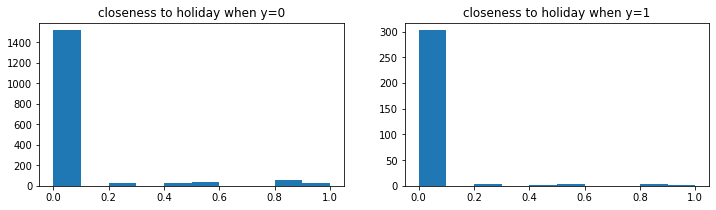

In [130]:
figure, axes = plt.subplots(1,2)
figure.set_size_inches((12,3))
for axe, yi in zip(axes, (0,1)):
    axe.hist(X_train.closeness_to_holiday[y_train ==yi])
    axe.set_title(f'closeness to holiday when y={yi}')
plt.show()

### filter out zero values to see how rest of data distributes

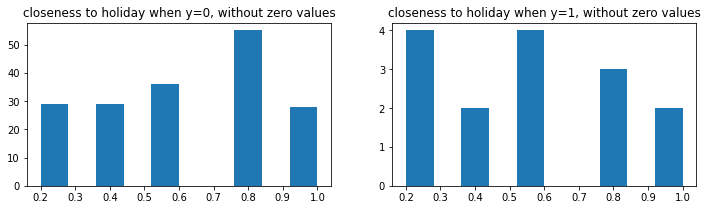

In [131]:
figure, axes = plt.subplots(1,2)
figure.set_size_inches((12,3))
for axe, yi in zip(axes, (0,1)):
    axe.hist(X_train.closeness_to_holiday[(y_train ==yi) & X_train.closeness_to_holiday != 0.0])
    axe.set_title(f'closeness to holiday when y={yi}, without zero values')
plt.show()

As we can see in the visualisations above, the correlation that we found occures because most of the values of this feature are zeros.  
So, beacuse we didn't find any intersting correlataions between this feature and others - we will use its mean to fill the null values.

In [132]:
def closeness_data_prep(X):    
    X.closeness_to_holiday = X.closeness_to_holiday.fillna(X_train.closeness_to_holiday.mean())
    return X

X_train = closeness_data_prep(X_train)
X_val = closeness_data_prep(X_val)
X_test = closeness_data_prep(X_test)


## Device

### see density:

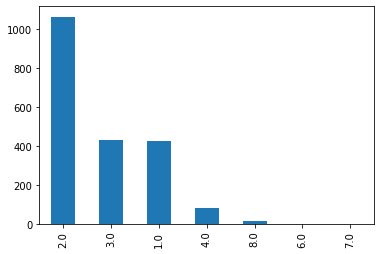

In [133]:
X_train.device.value_counts().plot.bar()
pass

In [134]:
def make_dummy_device(X: pd.DataFrame):
    mapper = {1.0: '1', 2.0: '2', 3.0: '3', 'Default': 'other'}
    X.device = [mapper.get(d, mapper['Default']) for d in X.device]    
    return pd.get_dummies(data=X, columns=['device'], drop_first=False, prefix_sep='_dmy_')
    
X_train = make_dummy_device(X_train)
X_val = make_dummy_device(X_val)
X_test = make_dummy_device(X_test)


## C feature

### density:

<AxesSubplot:>

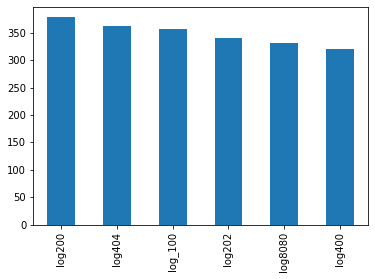

In [135]:
X_train.C.value_counts().plot.bar()

In [136]:
def make_dummy_C(X: pd.DataFrame):
    def extract_num(s):   
        if s is np.nan:
             return s
        for indx, chr in enumerate(s):
            if str.isdigit(chr):
                break
        return s[indx:]
    X.C = [extract_num(c) for c in X.C]

    return pd.get_dummies(data=X, columns=['C'], drop_first=False, prefix_sep='_dmy_')
    

X_train = make_dummy_C(X_train)
X_val = make_dummy_C(X_val)
X_test = make_dummy_C(X_test)


## weekend

### density:

<AxesSubplot:>

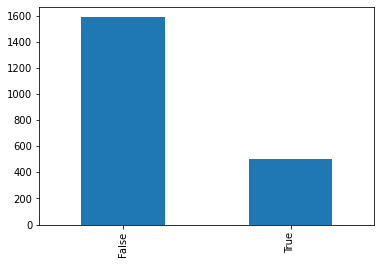

In [137]:
X_train.Weekend.value_counts().plot.bar()

Turn it to binary:

In [138]:
def weekend_data_prep(X):
    X.Weekend = [1 if w else 0 for w in X.Weekend]
    return X

X_train = weekend_data_prep(X_train)
X_val = weekend_data_prep(X_val)
X_test = weekend_data_prep(X_test)

X_train.Weekend.value_counts()

0    1588
1     507
Name: Weekend, dtype: int64

## B feature
fill with mean values

In [139]:
print("B nan count:", X_train.B.isnull().sum())
def b_data_prep(X):
    global X_train
    X.B = X.B.fillna(X_train.B.mean())
    return X

X_train = b_data_prep(X_train)
X_val = b_data_prep(X_val)
X_test = b_data_prep(X_test)

print("B nan count after filling - train:", X_train.B.isnull().sum())
print("B nan count after filling - validation:", X_val.B.isnull().sum())

B nan count: 6
B nan count after filling - train: 0
B nan count after filling - validation: 0


## browser

In [140]:
X_train.internet_browser = X_train.internet_browser.str.replace('\d+', '')
X_train['internet_browser'] = X_train['internet_browser'].astype(str).str.extract(r'([A-Za-z]+(?: [A-Za-z]+)*)')

X_val.internet_browser = X_val.internet_browser.str.replace('\d+', '')
X_val['internet_browser'] = X_val['internet_browser'].astype(str).str.extract(r'([A-Za-z]+(?: [A-Za-z]+)*)')

print(X_train.internet_browser.value_counts())

# corr = X_train.corr()
# sb.heatmap(corr.iloc[8:15].T[corr.columns != 'internet_browser'])


# X_train.internet_browser = ['Other' if i == 'nan' else X_train.internet_browser]

chrome     1286
safari      380
browser     192
nan         123
edge        114
Name: internet_browser, dtype: int64


In [141]:
X_train_browser_dummy = pd.get_dummies(X_train,columns=['internet_browser'],drop_first=False, prefix_sep='_dmy_')

### fill na - browser
To fill the nan values of browser, lets try to find any correlations to understand more about it.  

<AxesSubplot:>

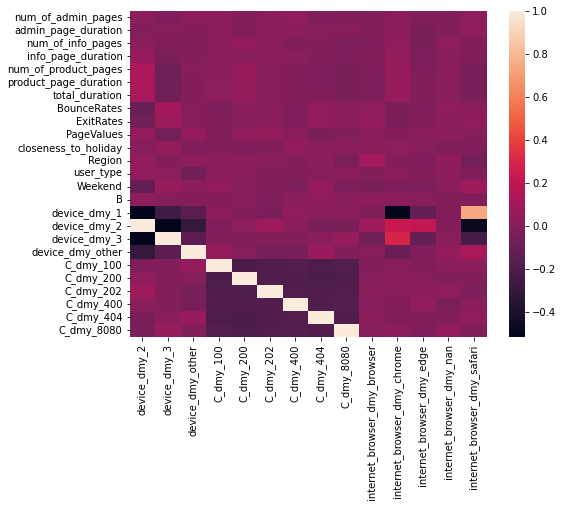

In [142]:
corr = X_train_browser_dummy.corr()
plt.figure(figsize=(8,6))
sb.heatmap(corr.iloc[16:].T[~corr.columns.str.startswith('internet_browser')])

We can see that there's a link between device and browser:  
Device 1 is linked to safari (could be iPhone or mac), devices 2 & 3 are linked to chrome.  
So we are going to fill the nan values according to the device.  
An observation with device 1 - will be filled with safari, and observation with device 2 or 3 will be filled with chrome.  
Because chome is the most common browser in our data - all the observation with device other - will be filled with chorme as well.

In [143]:
def browser_data_prep(X: pd.DataFrame):    
    X.internet_browser = X.internet_browser.str.replace('\d+', '')
    X['internet_browser'] = X['internet_browser'].astype(str).str.extract(r'([A-Za-z]+(?: [A-Za-z]+)*)')    
    X = pd.get_dummies(X,columns=['internet_browser'],drop_first=False, prefix_sep='_dmy_')    

    # device 1 means safari
    X.loc[(X.internet_browser_dmy_nan == 1) & (X.device_dmy_1 > 0), ('internet_browser_dmy_safari',)] = 1

    # device 2/3 means chrome
    X.loc[(X.internet_browser_dmy_nan == 1) & (X.device_dmy_2 + X.device_dmy_3  > 0), ('internet_browser_dmy_chrome',)] = 1

    print(X.loc[(X.internet_browser_dmy_nan == 1) & (X.device_dmy_other == 1)].shape[0], ' nan values left. we shall fill it with chrome - chrome is the most common')

    # # fill with chrome
    X.loc[(X.internet_browser_dmy_nan == 1) & (X.device_dmy_other == 1), 'internet_browser_dmy_chrome'] = 1

    # make sure no nan left 
    print(X.loc[(X.internet_browser_dmy_nan == 1) & ((X.internet_browser_dmy_chrome + X.internet_browser_dmy_safari) < 1)].shape[0], ' nan values left.')

    # drop nan dummy
    return X.drop(columns=['internet_browser_dmy_nan'])

X_train = browser_data_prep(X_train)
X_val = browser_data_prep(X_val)
X_test = browser_data_prep(X_test)

16  nan values left. we shall fill it with chrome - chrome is the most common
0  nan values left.
42  nan values left. we shall fill it with chrome - chrome is the most common
0  nan values left.
9  nan values left. we shall fill it with chrome - chrome is the most common
0  nan values left.


## month


### distribution:

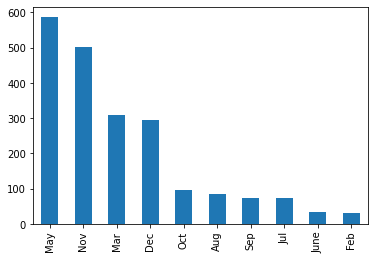

In [144]:
X_train.Month.value_counts().plot.bar()
pass

We can see that 2 monthes are missing.  
We decided to divide the year to 4 yearly quarters.  
Which means:  
Jan-Mar: quarter 1  
Apr-June: quarter 2  
Jul-Sep: quarter 3  
Oct-Dec: quarter 4

In [145]:
def month_data_prep(X):
     Month_map = {'JAN':1, 'Feb':1, 'Mar':1, 'APR':2, 'May':2, 'June':2, 'Jul':3, 'Aug':3, 'Sep':3, 'Oct':4, 'Nov':4, 'Dec':4}
     X.Month = X.Month.map(Month_map)
     X.Month = X.Month.fillna(X_train.Month.median())
     return X

X_train = month_data_prep(X_train)
X_val = month_data_prep(X_val)
X_test = month_data_prep(X_test)


X_train.Month.value_counts()

4.0    895
2.0    621
1.0    338
3.0    241
Name: Month, dtype: int64

## Region

### distribution:

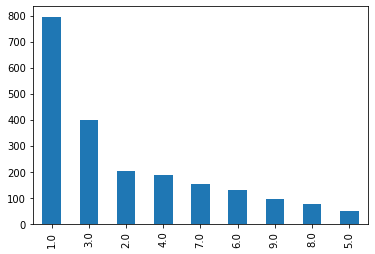

In [146]:
X_train.Region.value_counts().plot.bar()
pass

In [147]:

print('nan count before filling:', X_train.Region.isnull().sum())

# fill nan with median
def region_data_prep(X: pd.DataFrame):
    global X_train
    train_median = np.median(X_train.Region[~X_train.Region.isnull()])
    X.Region = X.Region.fillna(train_median)
    return X


X_train = region_data_prep(X_train)
X_val = region_data_prep(X_val)
X_test = region_data_prep(X_test)



print('nan count after filling:', X_train.Region.isnull().sum())

nan count before filling: 2
nan count after filling: 0


## A feature

### we noticed there are 2 types of values here:

In [148]:
t1 = X_train.A[[str(a).split('_').__len__() == 2 for a in X_train.A]]
t2 = X_train.A[[str(a).split('_').__len__() > 2 for a in X_train.A]]
print('type 1 example:',t1.iloc[0])
print('count', t1.shape[0])

print('\ntype 2 example:\n', t2.iloc[0])
print('count', t2.shape[0])

type 1 example: c_13
count 1915

type 2 example:
 c_20_74
count 34


we can also see most of the data includes valuse from "type 1":

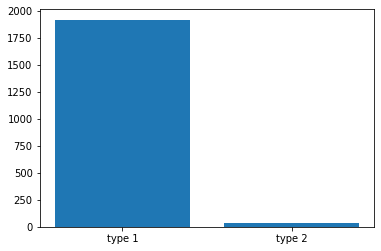

In [149]:
plt.bar(['type 1', 'type 2'],[t1.shape[0],t2.shape[0]])
pass

In [150]:
precent = (t2.shape[0]  / (t2.shape[0]+t1.shape[0])) * 100
print(f"type 2 values are {round(precent,2)}% from the data")

type 2 values are 1.74% from the data


In [151]:
print('type 1 describe:')
pd.Series([float(str(a).split('_')[1]) if str(a).split('_').__len__() == 2 else np.nan for a in X_train.A]).describe()

type 1 describe:


count    1915.000000
mean        3.800522
std         3.485887
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        19.000000
dtype: float64

since max is now 19, seems reasonble to use the `c_xx_??` type as `xx`  
this way we can transfer all using `.split('_')[1]`

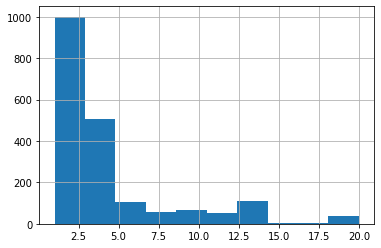

In [152]:
X_train.A = [np.nan if a is np.nan else float(str(a).split('_')[1]) for a in X_train.A]
X_val.A = [np.nan if a is np.nan else float(str(a).split('_')[1]) for a in X_val.A]
X_test.A = [np.nan if a is np.nan else float(str(a).split('_')[1]) for a in X_test.A]


X_train.A.hist()
pass

In [153]:
print('nan count:', X_train.A.isna().sum())

nan count: 146


### trying to find interesting corrlations between A and other features:

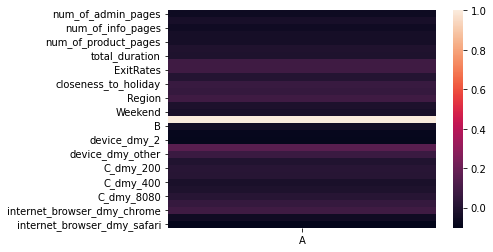

In [154]:
corr = X_train.corr()
sb.heatmap(corr[corr.columns == 'A'].T)
pass

Since the distribution decreases left to rihgt - we will fill all nan values with median.

### show new distribution after nan fill

nan count after filling - train: 0
nan count after filling - validation: 0


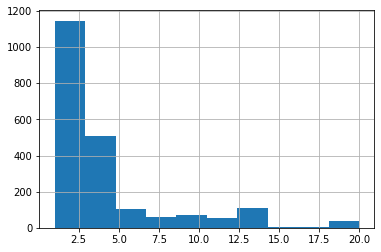

In [155]:
def a_data_prep(X, X_t):
    train_median = np.median(X_t.A[~X_t.A.isnull()])
    X.A = X.A.fillna(train_median)
    #X.A[X.A.isnull()] = train_median
    return X

X_train = a_data_prep(X_train, X_train)
X_val = a_data_prep(X_val, X_train)
X_test = a_data_prep(X_test, X_train)

X_train.A.hist()

print('nan count after filling - train:', X_train.A.isnull().sum())
print('nan count after filling - validation:', X_val.A.isnull().sum())

In [156]:
X_val.A

8599      2.0
4646     13.0
5836      5.0
2476      6.0
8509     13.0
         ... 
8127      2.0
5478      3.0
5310     13.0
2254      1.0
10429     7.0
Name: A, Length: 8384, dtype: float64

Before removing outliers and normalising the data, we performed the forward selection method for feature selection.  
You can see he's use and it's conclusions in the chapter - Dimensionality Reduction, under - feature forward selection.

In [157]:
# import statsmodels.api as sm
# def forward_selection(data, target, significance_level=0.05):
#     initial_features = X_train.columns.tolist()
#     best_features = []
#     while (len(initial_features)>0):
#         remaining_features = list(set(initial_features)-set(best_features))
#         new_pval = pd.Series(index=remaining_features)
#         for new_column in remaining_features:
#             model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
#             new_pval[new_column] = model.pvalues[new_column]
#         min_p_value = new_pval.min()
#         if(min_p_value<significance_level):
#             best_features.append(new_pval.idxmin())
#         else:
#             break
#     return best_features

In [158]:
# forward_selection(X_train,y_train)

## Outlier removal and scaling

This is the current distributions of all features:

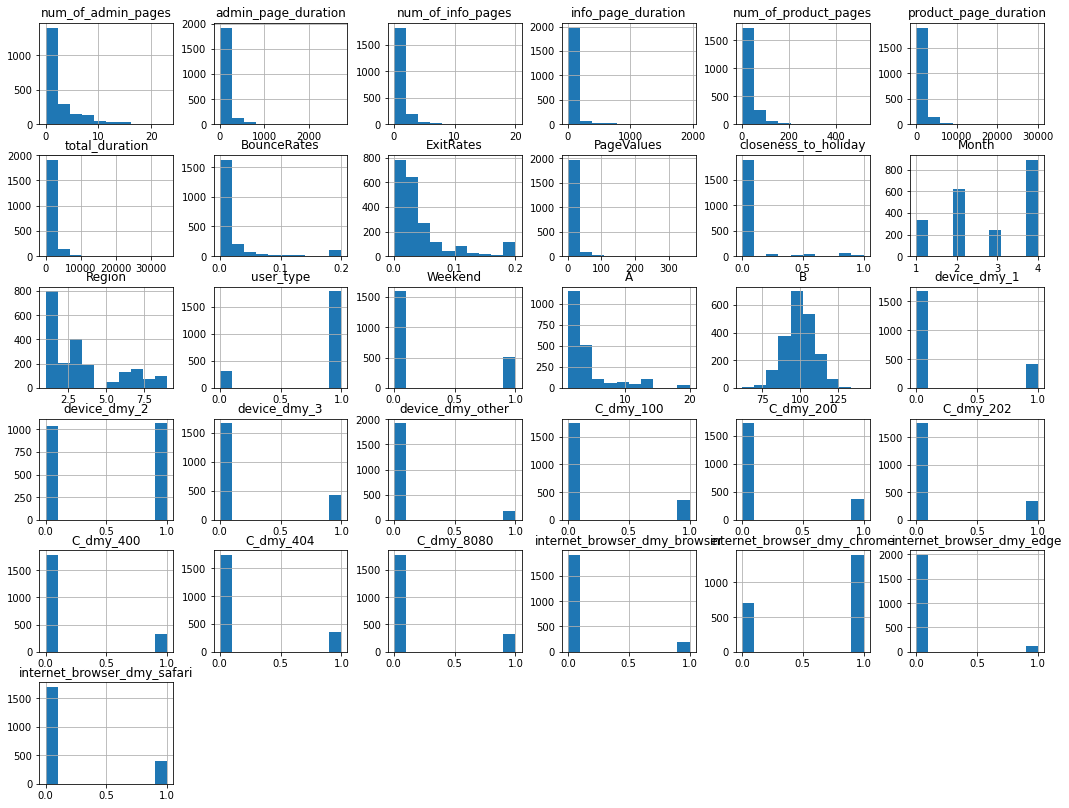

In [159]:
X_train.hist(figsize=(18,14))
pass

### spacial case: B 
B seems noraml distributed.
We took a closer look with the boxplot below,   
and decided it is very symetric (+- 40 from the mean)
This is why we decided there are no outliers in B features

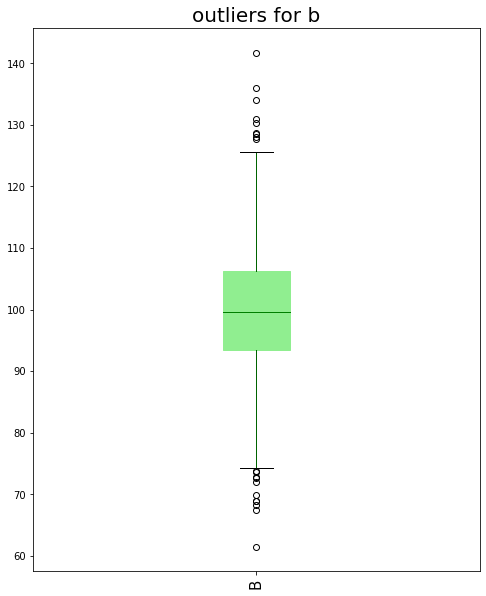

In [160]:
B_cloumn= pd.DataFrame(X_train.B)
props = dict(boxes="lightgreen", whiskers="darkgreen", medians="Green", caps="black")
plt_box = B_cloumn.plot.box(color=props, patch_artist=True,figsize=(8,10))
plt.xticks(rotation = 'vertical',size = 15)
plt_box.set_title('outliers for b',size = 20)
pass

In [161]:
X_train.B.var()

98.67363157091866

In [162]:
def outlier_removal(X, X_t):
    column_mask = (~X.columns.str.contains('_dmy_') & ~X.columns.isin(
        ['user_type', 'Weekend', 'Month', 'B', 'Region']))
    max_trashold = X.loc[:, column_mask].quantile(q=0.97)
    min_trashold = X.loc[:, column_mask].quantile(q=0.03)

    no_outliers = X.loc[:, column_mask]

    outlier_mask = ((no_outliers < min_trashold) | (
        no_outliers > max_trashold)).any(axis=1)

    mean = X_t.loc[:, column_mask].mean(
        axis=0).values.reshape(1, column_mask.sum())

    X.loc[outlier_mask, column_mask] = mean
    return X


X_train_inliers = outlier_removal(X_train.copy(), X_train)
X_val_inliers = outlier_removal(X_val.copy(), X_train)


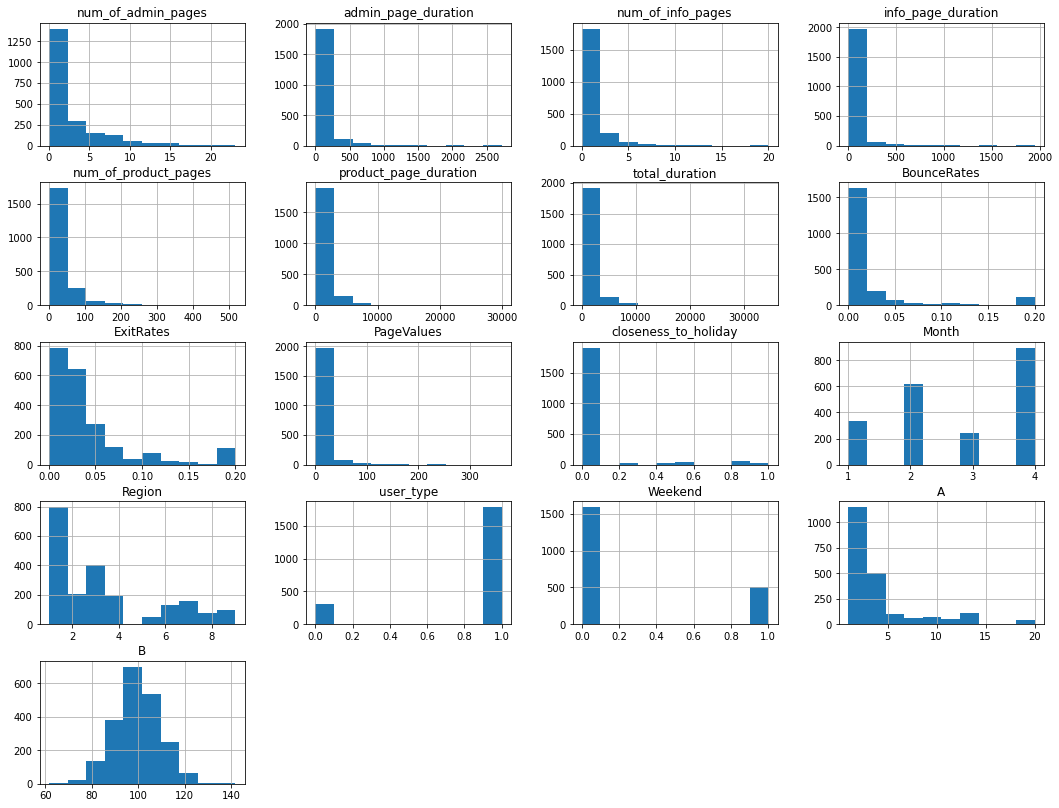

In [163]:
X_train.loc[:, ~X_train.columns.str.contains('_dmy_')].hist(figsize=(18,14))
pass

In [164]:
des = X_train.describe()
std = des.loc[des.index == 'std']
std.iloc[:,0:20]


,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,Month,Region,user_type,Weekend,A,B,device_dmy_1,device_dmy_2,device_dmy_3
std,3.496578,182.233186,1.300874,138.944919,45.654247,2008.276367,2167.854687,0.046948,0.047094,22.738759,0.196322,1.154465,2.460814,0.35704,0.428399,3.94651,9.93346,0.401875,0.500065,0.404676


In [165]:
std.iloc[:,20:]


,device_dmy_other,C_dmy_100,C_dmy_200,C_dmy_202,C_dmy_400,C_dmy_404,C_dmy_8080,internet_browser_dmy_browser,internet_browser_dmy_chrome,internet_browser_dmy_edge,internet_browser_dmy_safari
std,0.277468,0.376079,0.384637,0.369242,0.359827,0.378571,0.365271,0.288596,0.47296,0.226889,0.393503


In [166]:
del std, des 

In [167]:
duration_treshold = 30
print("users who purchesed after less then 30 seconds:",
      y_train[X_train['total_duration'] < duration_treshold].sum())
print(f'number of users under {duration_treshold} seconds:',
      X_train.loc[X_train['total_duration'] < duration_treshold].shape[0])


users who purchesed after less then 30 seconds: 1
number of users under 30 seconds: 166


In [168]:
X_train

,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,PageValues,...,C_dmy_100,C_dmy_200,C_dmy_202,C_dmy_400,C_dmy_404,C_dmy_8080,internet_browser_dmy_browser,internet_browser_dmy_chrome,internet_browser_dmy_edge,internet_browser_dmy_safari
2442,0.0,0.000000,0.0,0.00,5.0,108.000000,108.000000,0.000000,0.080000,0.000000,...,0,0,1,0,0,0,0,1,0,0
4138,7.0,188.166667,0.0,0.00,52.0,1089.642857,1277.809524,0.003509,0.010234,20.117930,...,0,0,0,0,0,1,1,0,0,0
8935,7.0,133.466667,4.0,46.50,26.0,1357.833333,1537.800000,0.000000,0.018487,18.269401,...,0,0,1,0,0,0,0,1,0,0
3648,4.0,259.000000,1.0,42.00,18.0,401.968254,702.968254,0.000000,0.017105,0.000000,...,0,0,0,0,1,0,0,0,0,1
10110,1.0,153.500000,0.0,0.00,26.0,1002.847222,1156.347222,0.000000,0.009524,41.134331,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6175,0.0,0.000000,0.0,0.00,2.0,12.000000,12.000000,0.000000,0.100000,0.000000,...,0,1,0,0,0,0,1,0,0,0
9704,1.0,10.500000,3.0,264.75,32.0,1232.617937,10320.007560,0.005025,0.023180,0.000000,...,0,0,0,0,0,1,0,1,0,0
10185,0.0,0.000000,0.0,0.00,9.0,891.500000,891.500000,0.000000,0.012500,0.000000,...,0,0,0,0,0,1,0,0,0,1
9256,7.0,104.450000,0.0,0.00,63.0,1242.661699,1347.111699,0.011912,0.026918,0.000000,...,0,0,0,0,1,0,0,0,0,1


In conclusion - As you can see in the models chapter, removing the outliers didn't improve our results and really changed the distribution of the features.  
The final model did not use outlier removal

### Scaling

We can see that our features appears in different scales, what causes different impact for each feature on out model. To fix this, and to make our models run faster - we need to normalize our data.

In [169]:
[f for f in X_train.columns if ('_dmy_' in f)]

['device_dmy_1',
 'device_dmy_2',
 'device_dmy_3',
 'device_dmy_other',
 'C_dmy_100',
 'C_dmy_200',
 'C_dmy_202',
 'C_dmy_400',
 'C_dmy_404',
 'C_dmy_8080',
 'internet_browser_dmy_browser',
 'internet_browser_dmy_chrome',
 'internet_browser_dmy_edge',
 'internet_browser_dmy_safari']

In [170]:
noraml_features = ['B']
dummy_features = [f for f in X_train.columns if ('_dmy_' in f)]
X_train.loc[:,~X_train.columns.isin(dummy_features + noraml_features)]

,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,Month,Region,user_type,Weekend,A
2442,0.0,0.000000,0.0,0.00,5.0,108.000000,108.000000,0.000000,0.080000,0.000000,0.000000,2.0,3.0,1,0,13.0
4138,7.0,188.166667,0.0,0.00,52.0,1089.642857,1277.809524,0.003509,0.010234,20.117930,0.000000,2.0,6.0,1,1,5.0
8935,7.0,133.466667,4.0,46.50,26.0,1357.833333,1537.800000,0.000000,0.018487,18.269401,0.000000,4.0,9.0,0,1,2.0
3648,4.0,259.000000,1.0,42.00,18.0,401.968254,702.968254,0.000000,0.017105,0.000000,0.059403,2.0,3.0,1,0,3.0
10110,1.0,153.500000,0.0,0.00,26.0,1002.847222,1156.347222,0.000000,0.009524,41.134331,0.000000,4.0,4.0,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6175,0.0,0.000000,0.0,0.00,2.0,12.000000,12.000000,0.000000,0.100000,0.000000,0.000000,3.0,2.0,1,0,6.0
9704,1.0,10.500000,3.0,264.75,32.0,1232.617937,10320.007560,0.005025,0.023180,0.000000,0.000000,4.0,1.0,1,0,2.0
10185,0.0,0.000000,0.0,0.00,9.0,891.500000,891.500000,0.000000,0.012500,0.000000,0.000000,4.0,1.0,1,0,2.0
9256,7.0,104.450000,0.0,0.00,63.0,1242.661699,1347.111699,0.011912,0.026918,0.000000,0.000000,4.0,8.0,1,0,2.0


In [171]:
noraml_features = ['B']
dummy_features = [f for f in X_train.columns if ('_dmy_' in f)]
scaled_features = ['closeness_to_holiday']

def features_scaling(X):
    # standard_scaler = StandardScaler()
    minmax_scalar = MinMaxScaler()
    # standard_scaler.fit(X_train.loc[:,noraml_features])
    # minmax_mask = ~X.columns.isin(dummy_features + noraml_features)
    minmax_mask = ~X.columns.isin(dummy_features + scaled_features)
    minmax_scalar.fit(X.loc[:,minmax_mask])

    # X.loc[:,noraml_features] = standard_scaler.transform(X.loc[:,noraml_features])
    X.loc[:,minmax_mask] = minmax_scalar.transform(X.loc[:,minmax_mask])

    return X 

X_train = features_scaling(X_train)
X_val = features_scaling(X_val)
X_test = features_scaling(X_test)


X_train

,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,PageValues,...,C_dmy_100,C_dmy_200,C_dmy_202,C_dmy_400,C_dmy_404,C_dmy_8080,internet_browser_dmy_browser,internet_browser_dmy_chrome,internet_browser_dmy_edge,internet_browser_dmy_safari
2442,0.000000,0.000000,0.00,0.000000,0.009671,0.003604,0.003123,0.000000,0.400000,0.000000,...,0,0,1,0,0,0,0,1,0,0
4138,0.304348,0.069166,0.00,0.000000,0.100580,0.036357,0.036956,0.017544,0.051170,0.055611,...,0,0,0,0,0,1,1,0,0,0
8935,0.304348,0.049060,0.20,0.023856,0.050290,0.045306,0.044475,0.000000,0.092437,0.050501,...,0,0,1,0,0,0,0,1,0,0
3648,0.173913,0.095203,0.05,0.021548,0.034816,0.013412,0.020331,0.000000,0.085526,0.000000,...,0,0,0,0,1,0,0,0,0,1
10110,0.043478,0.056423,0.00,0.000000,0.050290,0.033461,0.033443,0.000000,0.047619,0.113705,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6175,0.000000,0.000000,0.00,0.000000,0.003868,0.000400,0.000347,0.000000,0.500000,0.000000,...,0,1,0,0,0,0,1,0,0,0
9704,0.043478,0.003860,0.15,0.135827,0.061896,0.041128,0.298465,0.025126,0.115901,0.000000,...,0,0,0,0,0,1,0,1,0,0
10185,0.000000,0.000000,0.00,0.000000,0.017408,0.029746,0.025783,0.000000,0.062500,0.000000,...,0,0,0,0,0,1,0,0,0,1
9256,0.304348,0.038394,0.00,0.000000,0.121857,0.041463,0.038960,0.059559,0.134590,0.000000,...,0,0,0,0,1,0,0,0,0,1


In [172]:
##  check

minmax_mask = ~X_train.columns.isin(dummy_features + scaled_features)
X_train.loc[:,minmax_mask]

,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,PageValues,Month,Region,user_type,Weekend,A,B
2442,0.000000,0.000000,0.00,0.000000,0.009671,0.003604,0.003123,0.000000,0.400000,0.000000,0.333333,0.250,1.0,0.0,0.631579,0.380877
4138,0.304348,0.069166,0.00,0.000000,0.100580,0.036357,0.036956,0.017544,0.051170,0.055611,0.333333,0.625,1.0,1.0,0.210526,0.421998
8935,0.304348,0.049060,0.20,0.023856,0.050290,0.045306,0.044475,0.000000,0.092437,0.050501,1.000000,1.000,0.0,1.0,0.052632,0.329839
3648,0.173913,0.095203,0.05,0.021548,0.034816,0.013412,0.020331,0.000000,0.085526,0.000000,0.333333,0.250,1.0,0.0,0.105263,0.596423
10110,0.043478,0.056423,0.00,0.000000,0.050290,0.033461,0.033443,0.000000,0.047619,0.113705,1.000000,0.375,1.0,0.0,0.052632,0.703634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6175,0.000000,0.000000,0.00,0.000000,0.003868,0.000400,0.000347,0.000000,0.500000,0.000000,0.666667,0.125,1.0,0.0,0.263158,0.433263
9704,0.043478,0.003860,0.15,0.135827,0.061896,0.041128,0.298465,0.025126,0.115901,0.000000,1.000000,0.000,1.0,0.0,0.052632,0.482548
10185,0.000000,0.000000,0.00,0.000000,0.017408,0.029746,0.025783,0.000000,0.062500,0.000000,1.000000,0.000,1.0,0.0,0.052632,0.262463
9256,0.304348,0.038394,0.00,0.000000,0.121857,0.041463,0.038960,0.059559,0.134590,0.000000,1.000000,0.875,1.0,0.0,0.052632,0.436705


In [173]:
def validate_data_prep(X):
    print(X.isna().sum().max() == 0)
    print(np.all(X_train.max() <= 1))
    print(np.all(X_train.min() >= 0))

print('check train data:')
validate_data_prep(X_train)
print('check validation data:')
validate_data_prep(X_val)
print('check test data:')
validate_data_prep(X_test)

check train data:
True
True
True
check validation data:
True
True
True
check test data:
True
True
True


# Dimensionality Reduction
Reducing the number of features in our data can help reduce overfitting. Furthermore , the higher the dimension is - the more samples we need to get more reliable results.  
We chose PCA method.  
Next we will run the models with the reduced data to see if results improve (when fitting to the validation of course)

### PCA

In [174]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99, whiten=True)
pca.fit(X_train)
X_val_reduced = pca.transform(X_val)
X_train_reduced = pca.transform(X_train)

In [175]:
X_val_pca = pca.inverse_transform(X_val_reduced)
X_train_pca = pca.inverse_transform(X_train_reduced)

## Feature forward selection
After running the models, we didn't get good results with PCA and decided to try featrue selection.  
With feature selection we got better result for ANN.  



code:

    import statsmodels.api as sm
    def forward_selection(X, y, significance_level=0.05):
        initial_features = X_train.columns.tolist()
        best_features = []
        while (len(initial_features)>0):
            remaining_features = list(set(initial_features)-set(best_features))
            new_pval = pd.Series(index=remaining_features)
            for new_column in remaining_features:
                model = sm.OLS(y, sm.add_constant(X[best_features+[new_column]])).fit()
                new_pval[new_column] = model.pvalues[new_column]
            min_p_value = new_pval.min()
            if(min_p_value<significance_level):
                best_features.append(new_pval.idxmin())
            else:
                break
        return best_features

*result: ['PageValues',
 'product_page_duration',
 'ExitRates',
 'Month',
 'BounceRates',
 'device_dmy_2']*

In [176]:
best_features = ['PageValues',
 'product_page_duration',
 'ExitRates',
 'Month',
 'BounceRates',
 'device_dmy_2']

In [177]:
X_train_best = X_train.loc[:,best_features]
X_val_best = X_val.loc[:,best_features]
X_test_best = X_test.loc[:,best_features]

## Are we suffering from the curse of dimentioallity?
AS seen below, PCA does not imporve our result. Feature seleetion imporves some of the models,   
but not that drasticlly.  
On the other hand, reducing features increase preformance radicly. 

our conclustion from this, is that number of features in this case is not a set-back in the over-fitting sence  
but there are still an advantage in selecting a smaller group of the most significant features.  


# Models !

## generic k-fold validation function

In [178]:
from types import FunctionType

def validate_model(all_data, all_labels, model, model_name, num_folds=10):
    """validates model using auc on k-fold cross validation"""
    # 0.5 auc line
    baseline = [0,1]
    plt.plot(baseline, baseline, color='black', linestyle=':')
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    


    # fpr would be the x axis. this is to calc mean auc between all iterations
    fpr_all_values = np.linspace(0,1,100) 
    tpr_sum = np.array([0.0]*100) 
    auc_sum = 0

    for train_mask, val_mask in KFold(num_folds, shuffle=True, random_state=13).split(X=all_data, y=all_labels):
        xt = all_data.iloc[train_mask] # x train
        xv = all_data.iloc[val_mask] # x validation
        yt = all_labels.iloc[train_mask] # y train
        yv = all_labels.iloc[val_mask] # y validation
        
        model.fit(xt, yt)

        fpr, tpr, thresholds = roc_curve(yv, model.predict_proba(xv)[:,1])
        plt.plot(fpr, tpr, color='lightpink')
        tpr_sum += np.interp(fpr_all_values, fpr, tpr)
        auc_sum += roc_auc_score(yv, model.predict_proba(xv)[:,1])
            

    plt.plot(fpr_all_values, tpr_sum / num_folds , color='darkred')
    plt.title(f'{model_name} result. AUC={round(auc_sum / num_folds, 5)}')
    


def auc_score(model, xv, yv):
    return max(
            roc_auc_score(yv, model.predict_proba(xv)[:,i])
            for i in (0,1))

def accuracy_score(model,xv,yv):
    return model.score(xv, yv)

def plot_scores(model_class, arg_name:str, arg_values:list,
            other_args:dict = None, xt=X_train, xv=X_val,
            yt=y_train, yv=y_val, tuple_index=None,
            scoring:FunctionType = auc_score, plot_type='plot'):
    """ for example :  
            plot_scores(model_class=MLPClassifier,arg_name='hidden_layer_sizes', arg_values=hidden_layers_values,
                        other_args=args, xt=X_train, xv=X_val, yt=y_train, yv=y_val, tuple_index='both', scoring=scoring,plot_type='scatter')"""
    print(f'calculating and plotting scores for {model_class.__name__}:')
    multiplot = False
    d = other_args or {} 
    scores = []
    best = 0
    for i, value in enumerate(arg_values):
        print(f'progress: [{int((i / len(arg_values)) * 100)}%]\r', end='')
        d[arg_name] = value
        model = model_class(**d)
        model.fit(xt, yt)
        if not hasattr(scoring, '__iter__'):
            scores.append(scoring(model, xv, yv))
        else:
            multiplot = True
            current_scores = []
            for score in scoring:
                current_scores.append(score(model,xv,yv))
            scores.append(current_scores)
    
   
    values = None
    # spaciel case for nural networks
    if type(tuple_index) is int:
        values = [i[tuple_index] for i in arg_values]
    elif type(tuple_index) is str:
        values = [float(i[1]) + i[0] / 100 for i in arg_values] 
    else:
        values = arg_values      


    # plotting
    if multiplot:
        figure, axes = plt.subplots(1,len(scoring))
        figure.set_size_inches((12,4))
        func_name_prefix = 'set_'
        scores = np.array(scores).T
        best_is = scores.argmax(axis=1)
        bests = [(arg_values[best_index], scores[score_idnex][best_index]) for score_idnex, best_index in enumerate(best_is)]
        best = bests[0] # auc score
    else:
        best_i = np.argmax(scores)
        best = arg_values[best_i], scores[best_i] 
        bests= [best]
        axes = [plt]
        scoring = [scoring]
        func_name_prefix = ''
        scores = [scores]

    for i,axe in enumerate(axes):
        axe.__getattribute__(plot_type)(
            values, scores[i], label=f'best {arg_name}: {bests[i][0]}, best score: {round(bests[i][1],5)}')
        axe.__getattribute__ (func_name_prefix+'ylabel')(scoring[i].__name__)
        axe.__getattribute__ (func_name_prefix+'xlabel')(arg_name)
        axe.__getattribute__(func_name_prefix+'title')(f'{scoring[i].__name__} for {model_class.__name__}')
        axe.legend()
        
    return best


def plot_confusion_matrix(labels,preds):
    #Create the confusion matrix:
    cm = confusion_matrix(labels,preds)
    tn,fp,fn,tp = cm.ravel()
    cm = np.array([[tp,fp],[fn,tn]])

    # Plot the confusion matrix:
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')
    plt.show()
    


### combine all training data for k-fold

In [179]:
all_data = pd.concat([X_train, X_val])
all_label = pd.concat([y_train, y_val])

## logistic regression

### 1. running LR with no class weights.  
checking various c values

note: **we didnt use this configuration**

calculating and plotting scores for LogisticRegression:


(500, 0.8630829498411897)

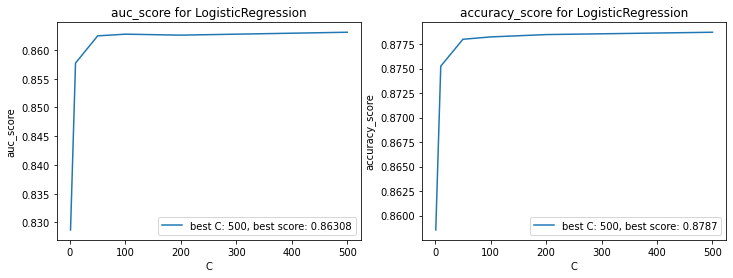

In [180]:
Cs = [1,10,50,100,200,500]
args = {
     "penalty":"l2", "dual":False, "tol":0.0001, "C":1, "fit_intercept":True,
      "intercept_scaling":1, "class_weight":None, "random_state":None, "solver":"lbfgs",
      "max_iter":100, "multi_class":"auto", "verbose":0, "warm_start":False, "n_jobs":None, "l1_ratio":None}


plot_scores(model_class=LogisticRegression, arg_name='C', arg_values=Cs, other_args=args, scoring=(auc_score, accuracy_score))



### 2. trying to use solver `saga` had very little affect.
code: 

    Cs = [1,10,50,100,200,500]
    args = {
    "penalty":"l2", "dual":False, "tol":0.0001, "C":1, "fit_intercept":True,
    "intercept_scaling":1, "class_weight":None, "random_state":None, "solver":"saga",
    "max_iter":100, "multi_class":"auto", "verbose":0, "warm_start":False, "n_jobs":None, "l1_ratio":None}
    plot_scores(model_class=LogisticRegression, arg_name='C', arg_values=Cs, other_args=args, )

*result: c=10, AUC=0.8071*



### 3. use class weighets
setting paramert `class_weight` to `balanced` tells the model to take into account y distribution in X_train.  
as shown below, this provides us a with an improvment in AUC.   


calculating and plotting scores for LogisticRegression:


(500, 0.8861936288348305)

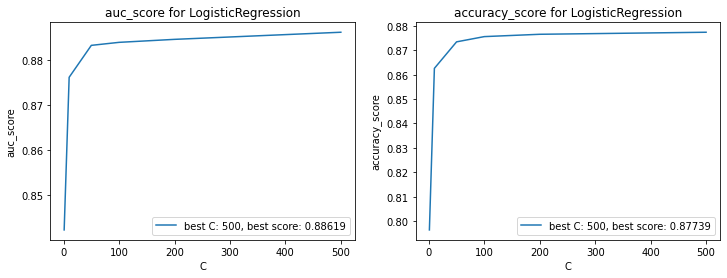

In [181]:
Cs = [1,10,50,100,200,500]
args = {
     "penalty":"l2", "dual":False, "tol":0.0001, "C":1, "fit_intercept":True,
      "intercept_scaling":1, "class_weight":'balanced', "random_state":None, "solver":"lbfgs",
      "max_iter":100, "multi_class":"auto", "verbose":0, "warm_start":False, "n_jobs":None, "l1_ratio":None}
plot_scores(model_class=LogisticRegression, arg_name='C', arg_values=Cs, other_args=args,scoring=(auc_score, accuracy_score))



calculating and plotting scores for LogisticRegression:


(50, 0.8919208868968853)

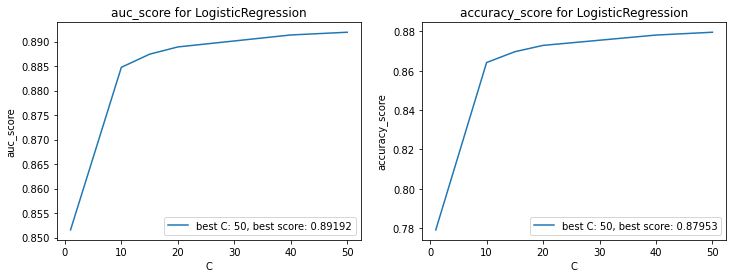

In [182]:
Cs = [1,10,15,20,40,50]
args = {
     "penalty":"l2", "dual":False, "tol":0.0001, "C":1, "fit_intercept":True,
      "intercept_scaling":1, "class_weight":'balanced', "random_state":None, "solver":"lbfgs",
      "max_iter":100, "multi_class":"auto", "verbose":0, "warm_start":False, "n_jobs":None, "l1_ratio":None}
plot_scores(model_class=LogisticRegression, arg_name='C', arg_values=Cs, other_args=args,scoring=(auc_score, accuracy_score), xt=X_train_best, xv=X_val_best)



### 4. no outliers version had no affect

    Cs = [1,10,15,20,40,50]
    args = {
        "penalty":"l2", "dual":False, "tol":0.0001, "C":1, "fit_intercept":True,
        "intercept_scaling":1, "class_weight":'balanced', "random_state":None, "solver":"lbfgs",
        "max_iter":100, "multi_class":"auto", "verbose":0, "warm_start":False, "n_jobs":None, "l1_ratio":None}
    plot_scores(model_class=LogisticRegression, arg_name='C', arg_values=Cs,
                other_args=args,scoring=(auc_score, accuracy_score), xt=X_train_inliers, xv=X_val_inliers)

*result: 0.82 AUC*        

### 4.1 run model on PCA version of the data - lower AUC

    Cs = [i for i in range(25,45,1)]
    args = {
        "penalty":"l2", "dual":False, "tol":0.0001, "C":1, "fit_intercept":True,
        "intercept_scaling":1, "class_weight":'balanced', "random_state":None, "solver":"lbfgs",
        "max_iter":100, "multi_class":"auto", "verbose":0, "warm_start":False, "n_jobs":None, "l1_ratio":None}
    plot_scores(model_class=LogisticRegression, arg_name='C', arg_values=Cs,
                other_args=args,scoring=(auc_score, accuracy_score), xt=X_train_reduced, xv=X_val_reduced)

*result: best AUC=0.73*

### 4.1  run model on feature selection version of the data - no effect on AUC

    Cs = [i for i in range(25,45,1)]
    args = {
        "penalty":"l2", "dual":False, "tol":0.0001, "C":1, "fit_intercept":True,
        "intercept_scaling":1, "class_weight":'balanced', "random_state":None, "solver":"lbfgs",
        "max_iter":100, "multi_class":"auto", "verbose":0, "warm_start":False, "n_jobs":None, "l1_ratio":None}
    plot_scores(model_class=LogisticRegression, arg_name='C', arg_values=Cs,
                other_args=args,scoring=(auc_score, accuracy_score), xt=X_train_best, xv=X_val_best)

*result: best AUC=0.85*

### 5. finding best c.
best auc is for c=50, best accuracy is for c=10. let's check range 5 to 80

code: 

        Cs = [i for i in range(5,80,5)]
    args = {
        "penalty":"l2", "dual":False, "tol":0.0001, "C":1, "fit_intercept":True,
        "intercept_scaling":1, "class_weight":'balanced', "random_state":None, "solver":"lbfgs",
        "max_iter":100, "multi_class":"auto", "verbose":0, "warm_start":False, "n_jobs":None, "l1_ratio":None}
    plot_scores(model_class=LogisticRegression, arg_name='C', arg_values=Cs, other_args=args,scoring=(auc_score, accuracy_score))

*result: c=30, AUC=0.8264*


### best Conifuration: **c=30 class_weight=balanced**
when zooming in to 25-45 range. seems accuracy and auc agrees on similar values (25,30)

### *however, this is not the chosen model.*

calculating and plotting scores for LogisticRegression:


(40, 0.8829620489925293)

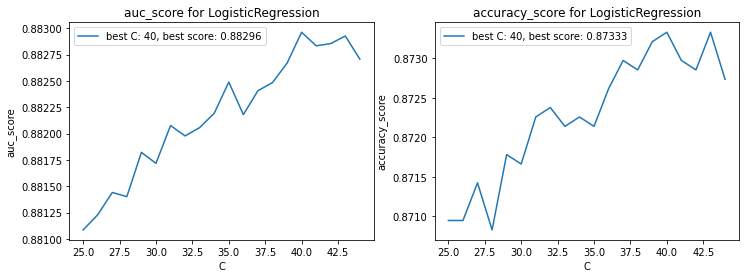

In [183]:
Cs = [i for i in range(25,45,1)]
args = {
     "penalty":"l2", "dual":False, "tol":0.0001, "C":1, "fit_intercept":True,
      "intercept_scaling":1, "class_weight":'balanced', "random_state":None, "solver":"lbfgs",
      "max_iter":100, "multi_class":"auto", "verbose":0, "warm_start":False, "n_jobs":None, "l1_ratio":None}
plot_scores(model_class=LogisticRegression, arg_name='C', arg_values=Cs,
             other_args=args,scoring=(auc_score, accuracy_score))


### K-fold validation on chosen LR configuration:
**final score: 0.838 AUC**


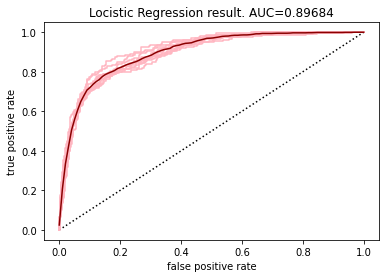

In [184]:
model = LogisticRegression(penalty="l2", dual=False, tol=0.0001, C=30, fit_intercept=True, intercept_scaling=1, class_weight='balanced',
                           random_state=None, solver="lbfgs", max_iter=100, multi_class="auto", verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
validate_model(all_data, all_label, model, 'Locistic Regression')

## K-nn 
 

### when chcking kn in the range of 1-80, best auc is 068, which is pretty low:

calculating and plotting scores for KNeighborsClassifier:


(66, 0.6457930494001827)

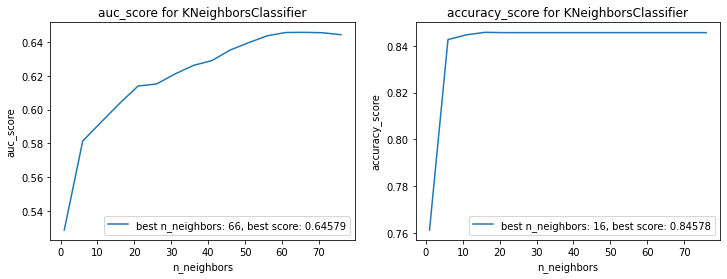

In [185]:

ns = [n for n in range(1,80,5)]
args = {"weights":'uniform', "algorithm":'auto', "leaf_size":30, "p":2,
        "metric": 'minkowski', "metric_params": None, "n_jobs": None}


plot_scores(model_class=KNeighborsClassifier, arg_name="n_neighbors",
            arg_values=ns, other_args=args, scoring=(auc_score, accuracy_score))




### try using PCA version of the data has no improvment:

code we ran:

        ns = [n for n in range(35,65,2)]
        args = {"weights":'uniform', "algorithm":'auto', "leaf_size":30, "p":2,
                "metric": 'minkowski', "metric_params": None, "n_jobs": None}


        plot_scores(model_class=KNeighborsClassifier, arg_name="n_neighbors",
                arg_values=ns, other_args=args, scoring=(auc_score, accuracy_score),xt=X_train_pca)


*result is still 0.68*

### setting weights to `distance`. which mean the distance between points is considered.
closer neighubers influence more that far away ones
this helped a little, but doesnt seem signifigant


        ns = [n for n in range(45,65,2)]
        args = {"n_neighbors":5, "weights":'distance', "algorithm":'auto', "leaf_size":30, "p":2,
                "metric": 'minkowski', "metric_params": None, "n_jobs": None}


        plot_scores(model_class=KNeighborsClassifier, arg_name="n_neighbors",
                arg_values=ns, other_args=args, scoring=(auc_score, accuracy_score))

*result is still 0.68*



### KNN results are very poor. 
### This is not the chosen model.

seems the right number of neighbors would be around []. we'll let `GridSearch` decide the exact value

code:
    
    ns = [i for i in range(15,40,1)]
    cross_valudation = GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=50, ), param_grid={'n_neighbors': ns}, scoring='roc_auc')
    cross_valudation.fit(all_data, all_label)
    best_n = cross_valudation.best_estimator_.n_neighbors

*result: 27 neighbours*


### final score: 0.669 AUC

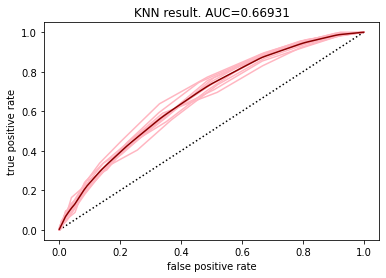

In [186]:
model = KNeighborsClassifier(n_neighbors=27)
validate_model(all_data, all_label, model, 'KNN')

## Multi-Layer Perceptron

in order to quicly get a direction of correct network architecture, we will set max_iter to 70.
and use grid search to find best parameters

### to quckly get a since of the right archtiecture, we set `max_iter`-iter to 100


        args = {'max_iter':100, 'solver':'sgd','verbose':False,
                'tol':10**-6,'random_state':13, 'learning_rate_init':1,
                'learning_rate':'adaptive', 'alpha':0.01, }
        hidden_layers_values = []
        for d1 in range(50,300,15):
                for d2 in range(2,15,2):
                        hidden_layers_values.append((d1,d2))
        print(len(hidden_layers_values))

        plot_scores(MLPClassifier,'hidden_layer_sizes', hidden_layers_values, args, 
        X_train, X_val, y_train, y_val, 'both')


**best score: layers=(165,14) AUC = 0.81**


### running with best features only (feature selections)

code:

    args = {'max_iter':100, 'solver':'sgd','verbose':False,
                'tol':10**-6,'random_state':13, 'learning_rate_init':1,
                'learning_rate':'adaptive', 'alpha':0.01, }
    hidden_layers_values = []
    for d1 in range(50,300,15):
        for d2 in range(2,15,2):
                hidden_layers_values.append((d1,d2))
    print(len(hidden_layers_values))

    plot_scores(MLPClassifier,'hidden_layer_sizes', hidden_layers_values, args, 
    X_train_best, X_val_best, y_train, y_val, 'both')

*Results: AUC=0.88*

20
calculating and plotting scores for MLPClassifier:


((29, 12), 0.9105885251012048)

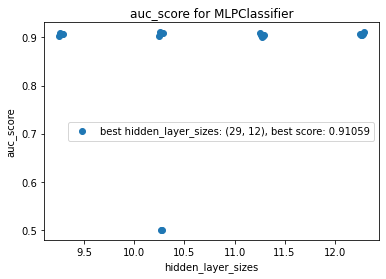

In [187]:
args = {'max_iter':100, 'solver':'sgd','verbose':False,
            'tol':10**-6,'random_state':13, 'learning_rate_init':1,
            'learning_rate':'adaptive', 'alpha':0.01, }
hidden_layers_values = []
for d1 in range(25,30):
    for d2 in range(9,13):
            hidden_layers_values.append((d1,d2))
print(len(hidden_layers_values))

plot_scores(MLPClassifier,'hidden_layer_sizes', hidden_layers_values, args, 
X_train_best, X_val_best, y_train, y_val, 'both', plot_type='scatter')

### now we took closer and deeper look, with max_itter 500 and range (160-169, 14,17)

the code we ran:

    args = {'max_iter':500, 'solver':'sgd','verbose':False,
            'tol':10**-6,'random_state':13, 'learning_rate_init':1,
            'learning_rate':'adaptive', 'alpha':0.01, }
    hidden_layers_values = []
    for d1 in range(160,170,1):
            for d2 in range(14,18,1):
                    hidden_layers_values.append((d1,d2))
    print(len(hidden_layers_values))

    scoring = (auc_score, accuracy_score)
    plot_scores(MLPClassifier,'hidden_layer_sizes', hidden_layers_values, args, 
    X_train, X_val, y_train, y_val, 'both', scoring, plot_type='scatter')

*result: 0.866 AUC with 161 neurouns and 15 layers*

running with no outliers:

        args = {'max_iter':500, 'solver':'sgd','verbose':False,
                'tol':10**-6,'random_state':13, 'learning_rate_init':1,
                'learning_rate':'adaptive', 'alpha':0.01, }
        hidden_layers_values = []
        for d1 in range(10,50,10):
                for d2 in range(1,10,3):
                        hidden_layers_values.append((d1,d2))
        print(len(hidden_layers_values))

        scoring = (auc_score, accuracy_score)
        plot_scores(model_class=MLPClassifier,arg_name='hidden_layer_sizes', arg_values=hidden_layers_values, other_args=args, 
        tuple_index='both', scoring=scoring, plot_type='scatter', xt=X_train_inliers, xv=X_val_inliers)

*max AUC = 0.82*

### apply model on pca version of the data:
code:

    model = MLPClassifier(hidden_layer_sizes=(161,15), max_iter=500, solver='sgd',
                            tol=10**-6,random_state=13, learning_rate_init=0.1, alpha=0.01, learning_rate='adaptive')
    validate_model(pd.DataFrame(X_train_pca), pd.Series(y_train), model, 'MLP', num_folds=2)

*result best auc: 0.63*

### model validation - best configuration: (28,11) using feature selection
*best score: 0.88*

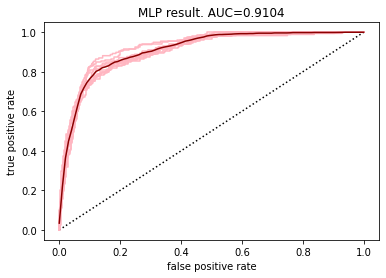

In [188]:
all_data_best = pd.concat([X_train_best, X_val_best])


model = MLPClassifier(hidden_layer_sizes=(28,11), max_iter=500, solver='sgd',
                        tol=10**-6,random_state=13, learning_rate_init=0.1, alpha=0.1, learning_rate='adaptive')
validate_model(all_data_best, all_label, model, 'MLP')

## Ada Boost Tree

### 1. choose number of estimators

calculating and plotting scores for AdaBoostClassifier:


(17, 0.919455967980677)

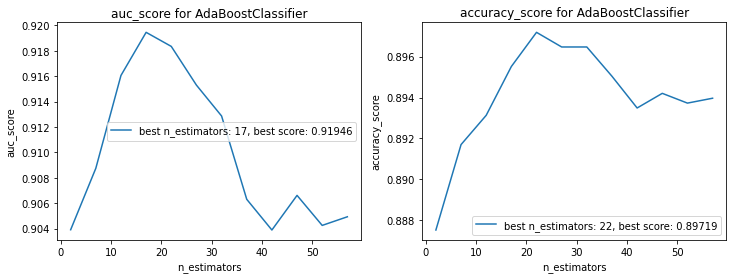

In [189]:
base = DecisionTreeClassifier(max_depth=2)
args = {"base_estimator":base, "learning_rate":0.1, "algorithm":"SAMME.R", "random_state":None}

ns = [i for i in range(2,60,5)]

plot_scores(model_class=AdaBoostClassifier, arg_name="n_estimators", arg_values=ns, other_args=args, scoring=(auc_score, accuracy_score))

### 1.1 let's zoom in to the range 15-25

calculating and plotting scores for AdaBoostClassifier:


(16, 0.9194681212845225)

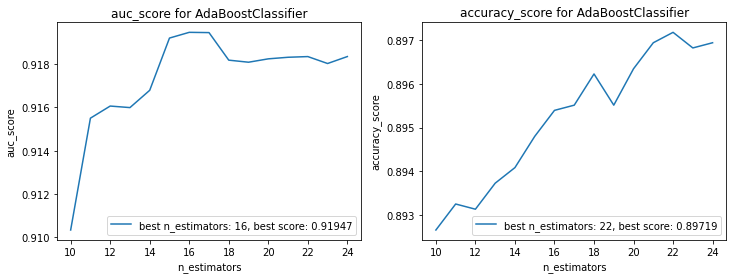

In [190]:
base = DecisionTreeClassifier(max_depth=2)
args = {"base_estimator":base, "learning_rate":0.1, "algorithm":"SAMME.R", "random_state":None}

plot_scores(model_class=AdaBoostClassifier, arg_name='n_estimators',
            other_args=args, arg_values=[i for i in range(10, 25, 1)], scoring=(auc_score, accuracy_score))


calculating and plotting scores for AdaBoostClassifier:


(24, 0.9163836890672585)

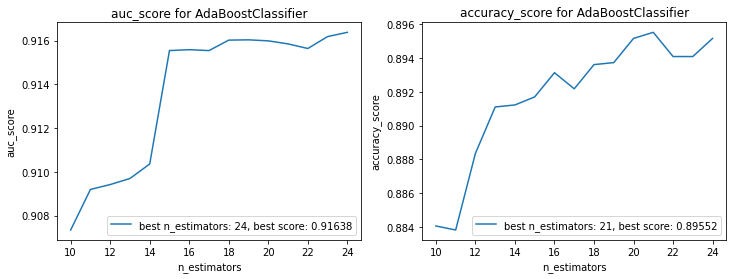

In [191]:
base = DecisionTreeClassifier(max_depth=2)
args = {"base_estimator":base, "learning_rate":0.1, "algorithm":"SAMME.R", "random_state":None}

plot_scores(model_class=AdaBoostClassifier, arg_name='n_estimators',
            other_args=args, arg_values=[i for i in range(10, 25, 1)], scoring=(auc_score, accuracy_score), xt=X_train_best, xv=X_val_best)


### no outliers version did not improve results
code we ran:

    args = {"base_estimator":base, "learning_rate":0.1, "algorithm":"SAMME.R", "random_state":None}
    plot_scores(model_class=AdaBoostClassifier, arg_name='n_estimators',
                other_args=args, arg_values=[i for i in range(10, 25, 1)], scoring=(auc_score, accuracy_score), xt=X_train_inliers, xv=X_val_inliers)


*result was 0.82 AUC*

### pca version did not improve results
code we ran:

    plot_scores(model_class=AdaBoostClassifier, arg_name='n_estimators',arg_values=[i for i in range(15,25,1)], scoring=scoring,
    xt=X_train_pca, xv=X_val_pca)

*result was 0.838 AUC*

### 2. using grid to determine num of max depth of each tree

    param_grid = {
        'n_estimators': [i for i in range(10,21,1)], 
        'base_estimator': [DecisionTreeClassifier(max_depth=i) for i in range(1,6)]
    }


    cross_valudation = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid, scoring='roc_auc')
    cross_valudation.fit(all_data, all_label)
    best_n = cross_valudation.best_estimator_

    print("chosen params:", best_n)

*result: 16 estimators, tree depth 2*

# chosen model evaluation

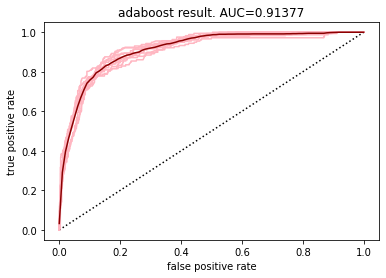

In [192]:
best_n = 16
validate_model(all_data, all_label, AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=16),'adaboost')

## confusion matrix
The meaning of the matrix:
    
        [TP][FP]
        [FN][TN]

A "good" confution matrix will show high `True Positive` and `True Negative`, and a low `False Negative` and `False Positive`.  
In our case, the `False` fields are indeed the lowest.  
  
However, the `True Positive` field is quite low, and with  magnitude closer to the `False` fields.  
This is probebly because the propotions of the label are simialr ! there are almost 10 times more y=0 than y=1.

To conclude, We think that our confution matrix shows good results

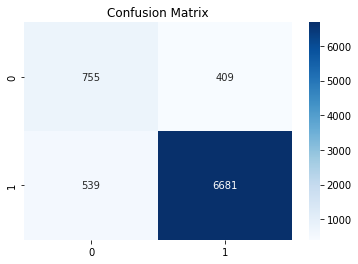

0.9033832508943306

In [193]:
model = AdaBoostClassifier(n_estimators=best_n)
model.fit(X_train, y_train)
preds = model.predict(X_val)
plot_confusion_matrix(y_val, preds)
auc_score(model, X_val, y_val)

## compare train to validation
We can see bellow that the train and validation AUC are simillar
This is a signal for low overfitting. the gap between the validation  
 and test results is traditionally considered a measure for overfitting

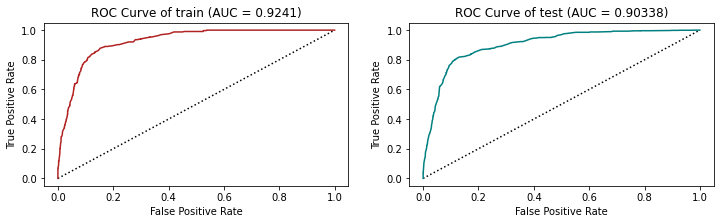

In [194]:
def plot_roc_curves(fprs, tprs, aucs, titels, colors):
    figure, axes = plt.subplots(1,2)
    figure.set_size_inches((12,3))
    for axe, fpr, tpr, auc, title, color in zip(axes, fprs, tprs, aucs, titels, colors):
        baseline = [0,1]
        axe.plot(baseline, baseline, color='black', linestyle=':')
        axe.plot(fpr,tpr,color=color, label=title)
        axe.set_xlabel('False Positive Rate')
        axe.set_ylabel('True Positive Rate')
        axe.set_title(f'ROC Curve of {title} (AUC = {round(auc,5)})')
    plt.show()        

fpr1, tpr1, trsh = roc_curve(y_train, model.predict_proba(X_train)[:,1])
auc1 = auc_score(model, X_train, y_train)

fpr2, tpr2, trsh = roc_curve(y_val, model.predict_proba(X_val)[:,1])
auc2 = auc_score(model, X_val, y_val)

plot_roc_curves([fpr1, fpr2], [tpr1, tpr2], [auc1,auc2], ['train', 'test'], ['firebrick', 'teal'])



## **Feature importance** (fetures with 0 importance filterd out)

Interstingly, all the feature chosen in OLS feature selection is present here. but adaboost chose a banch more.
1. duration in product page makes much since: pepole who spend time in the product's are more likely to buy it.
2. num of product pages is intersing, it might be that 

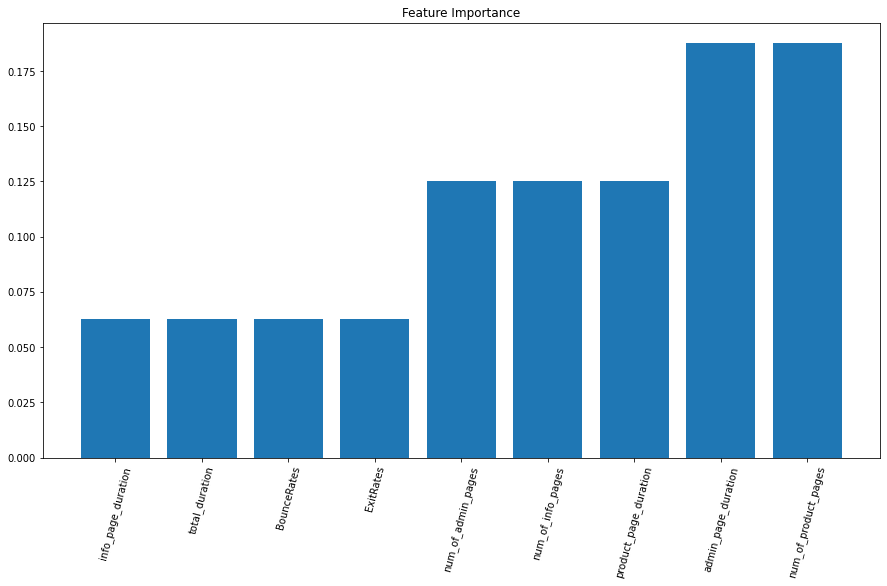

In [195]:
imp_featues = model.feature_importances_[model.feature_importances_>0]
sorted_idx = np.argsort(imp_featues)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(15,8))
plt.bar(pos, imp_featues[sorted_idx], align='center')
plt.xticks(pos, np.array(all_data.columns)[sorted_idx], rotation=75)
plt.title('Feature Importance')
plt.show()

# Prediction on Test Data

In [196]:

predictions = pd.DataFrame(data = model.predict_proba(X_test)[:,1], index=X_test.index)
predictions.rename(columns = {0:'predict_prob'}).to_csv("Submission_group_24.csv",index = True,index_label='id')

In [197]:
X_train.columns.shape

(31,)

# Full Pipeline


In [198]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

### data preperations functions

In [199]:
def id_prep(X, X_t):
    X = X.set_index('id')
    return X


def d_data_prep(X, X_t):
    return X.drop(columns=('D'))

def page_durations_prep(X, X_t):
    fields = ['info_page_duration', 'product_page_duration']
    for field in fields:
        print(field, 'str structure:', X[field].value_counts().index[0])

        # make sure all durations are in minutes
        print('not minutes count: ', len(X.loc[~X[field].str.contains('minutes').astype('bool'),(field)]))
        print('nan count: ', X[field].isnull().sum())

        # convert to float `type(d)==str ` handles nan values
        X[field] = [float(d.split()[0]) if type(d) is str else np.nan for d in X[field]]

        print('new types:')
        X.dtypes[fields]

    return X

avg_time_in_admin_page, avg_time_in_info_page, avg_time_in_product_page = (None, None, None)


def page_durations_fill_na(X, X_t):
    global avg_time_in_admin_page, avg_time_in_info_page, avg_time_in_product_page
    avg_time_in_admin_page = (X_t.admin_page_duration / X_t.num_of_admin_pages).mean()
    avg_time_in_info_page = (X_t.info_page_duration / X_t.num_of_info_pages).mean()
    avg_time_in_product_page = (X_t.product_page_duration / X_t.num_of_product_pages).mean()

    avgs = (avg_time_in_info_page, avg_time_in_product_page, avg_time_in_admin_page)
    duration_fields = ('info_page_duration', 'product_page_duration', 'admin_page_duration')
    num_of_fields = ('num_of_info_pages', 'num_of_product_pages','num_of_admin_pages')
    for i, field in enumerate(duration_fields):        
        num_of_field_copy = X[num_of_fields[i]].copy()
        num_of_field_copy = num_of_field_copy.fillna(num_of_field_copy.mean())
        X.loc[X[field].isna(), field] = avgs[i] * num_of_field_copy.loc[X[field].isna()]
    return X    

def total_druation_data_prep(X, X_t):
    computed_durations = X.admin_page_duration + X.info_page_duration + X.product_page_duration
    X.total_duration = X.total_duration.fillna(computed_durations)
    return X

def num_of_visits_data_prep(X: pd.DataFrame, X_t):
    global avg_time_in_admin_page, avg_time_in_info_page, avg_time_in_product_page
    avgs = (avg_time_in_info_page, avg_time_in_product_page, avg_time_in_admin_page)
    duration_fields = ('info_page_duration', 'product_page_duration', 'admin_page_duration')
    num_of_fields = ('num_of_info_pages', 'num_of_product_pages','num_of_admin_pages')
    for i, field in enumerate(num_of_fields):
        X.loc[X[field].isna(), field] = [ int(value / avgs[i]) for value in X.loc[X[field].isna(), duration_fields[i]]]
    return X


def rates_page_value_data_prep(X, X_t):    
    # so little nan values - lets fill with mean
    X.BounceRates = X.BounceRates.fillna(X_t.BounceRates.mean())
    X.ExitRates = X.ExitRates.fillna(X_t.ExitRates.mean())
    X.PageValues = X.PageValues.fillna(X_t.PageValues.mean())
    return X

def user_type_data_prep(X, X_t):
    RETURNING ='Returning_Visitor'
    X.user_type = [1 if u_type == RETURNING else 0 for u_type in X.user_type] 
    return X

def closeness_data_prep(X, X_t):    
    X.closeness_to_holiday = X.closeness_to_holiday.fillna(X_t.closeness_to_holiday.mean())
    return X

def make_dummy_C(X: pd.DataFrame, X_t):
    def extract_num(s):   
        if s is np.nan:
             return s
        for indx, chr in enumerate(s):
            if str.isdigit(chr):
                break
        return s[indx:]
    X.C = [extract_num(c) for c in X.C]

    return pd.get_dummies(data=X, columns=['C'], drop_first=False, prefix_sep='_dmy_')

def weekend_data_prep(X, X_t):
    X.Weekend = [1 if w else 0 for w in X.Weekend]
    return X

def b_data_prep(X, X_t):    
    X.B = X.B.fillna(X_t.B.mean())
    return X

def make_dummy_device(X: pd.DataFrame, X_t):
    mapper = {1.0: '1', 2.0: '2', 3.0: '3', 'Default': 'other'}
    X.device = [mapper.get(d, mapper['Default']) for d in X.device]    
    return pd.get_dummies(data=X, columns=['device'], drop_first=False, prefix_sep='_dmy_')
    

def browser_data_prep(X: pd.DataFrame, X_t):    
    X.internet_browser = X.internet_browser.str.replace('\d+', '')
    X['internet_browser'] = X['internet_browser'].astype(str).str.extract(r'([A-Za-z]+(?: [A-Za-z]+)*)')    
    X = pd.get_dummies(X,columns=['internet_browser'],drop_first=False, prefix_sep='_dmy_')    


    # device 1 means safari
    X.loc[(X.internet_browser_dmy_nan == 1) & (X.device_dmy_1 > 0), ('internet_browser_dmy_safari',)] = 1

    # device 2/3 means chrome
    X.loc[(X.internet_browser_dmy_nan == 1) & (X.device_dmy_2 + X.device_dmy_3  > 0), ('internet_browser_dmy_chrome',)] = 1

    print(X.loc[(X.internet_browser_dmy_nan == 1) & (X.device_dmy_other == 1)].shape[0], ' nan values left. we shall fill it with chrome - chrome is the most common')

    # # fill with chrome
    X.loc[(X.internet_browser_dmy_nan == 1) & (X.device_dmy_other == 1), 'internet_browser_dmy_chrome'] = 1

    # make sure no nan left 
    print(X.loc[(X.internet_browser_dmy_nan == 1) & ((X.internet_browser_dmy_chrome + X.internet_browser_dmy_safari) < 1)].shape[0], ' nan values left.')

    # drop nan dummy
    return X.drop(columns=['internet_browser_dmy_nan'])

def month_data_prep(X, X_t):
     Month_map = {'Jan':1, 'Feb':1, 'Mar':1, 'Apr':2, 'May':2, 'June':2, 'Jul':3, 'Aug':3, 'Sep':3, 'Oct':4, 'Nov':4, 'Dec':4}
     X.Month = X.Month.map(Month_map)
     X.Month = X.Month.fillna(X_t.Month.median())
     return X


dp_month_median = None
def month_data_prep2(X,X_t):
     global dp_month_median     
     Month_map = {'Jan':1, 'Feb':1, 'Mar':1, 'Apr':2, 'May':2, 'June':2, 'Jul':3, 'Aug':3, 'Sep':3, 'Oct':4, 'Nov':4, 'Dec':4}
     X.Month = X.Month.map(Month_map)
     if not dp_month_median:
        dp_month_median = X_t.Month.median()
     X.Month = X.Month.fillna(dp_month_median)     
     X = pd.get_dummies(X, columns=['Month'], prefix_sep='dmy', drop_first=False)
     return X

def region_data_prep(X: pd.DataFrame, X_t):
    train_median = np.median(X_t.Region[~X_t.Region.isnull()])
    X.Region = X.Region.fillna(train_median)
    return X

def a_data_prep(X,X_t):
    X.A = [np.nan if a is np.nan else float(str(a).split('_')[1]) for a in X.A]
    X.A = X.A.fillna(X_t.A.median())
    #X.A[X.A.isnull()] = train_median
    return X

ourlier_precentile = 0.98

def outlier_removal(X, X_t):    
    column_mask = (~X.columns.str.contains('_dmy_') & ~X.columns.isin(['user_type', 'Weekend', 'Month', 'B']))
    max_trashold = X.loc[:,column_mask].quantile(q=ourlier_precentile)
    min_trashold = X.loc[:,column_mask].quantile(q=(1 - ourlier_precentile))

    no_outliers =  X.loc[:,column_mask]

    outlier_mask = ((no_outliers < min_trashold) | (no_outliers > max_trashold)).any(axis=1)

    mean = X_t.loc[:,column_mask].mean(axis=0).values.reshape(1,column_mask.sum())

    X.loc[outlier_mask,column_mask] = mean
    return X

def features_scaling(X, X_t):    
    dummy_features = [f for f in X_train.columns if ('_dmy_' in f)]

    minmax_scalar = MinMaxScaler()    
    minmax_mask = ~X.columns.isin(dummy_features)
    minmax_scalar.fit(X.loc[:,minmax_mask])
    X.loc[:,minmax_mask] = minmax_scalar.transform(X.loc[:,minmax_mask])

    return X 

### Robust way to try diffrent data preperations 

In [200]:
save_print_func = print
data_prep_functions = [
    id_prep,d_data_prep, page_durations_prep, page_durations_fill_na, total_druation_data_prep, 
    num_of_visits_data_prep, rates_page_value_data_prep, user_type_data_prep ,closeness_data_prep, make_dummy_C,
    weekend_data_prep, b_data_prep,make_dummy_device, browser_data_prep, month_data_prep, region_data_prep, a_data_prep,
    # outlier_removal,
     features_scaling
]

# data_prep_functions = [
#     id_prep,d_data_prep, page_durations_prep, page_durations_fill_na, total_druation_data_prep, 
#     num_of_visits_data_prep, rates_page_value_data_prep, user_type_data_prep ,closeness_data_prep, make_dummy_C,
#     weekend_data_prep, b_data_prep,make_dummy_device, browser_data_prep,
#     month_data_prep2, # <--------
#     region_data_prep, a_data_prep,
#     outlier_removal,
#      features_scaling
# ]

def silent_print(*args, **kwargs):
    return
    

print = silent_print


data = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')
id_test = X_test.id

Y = data.loc[:,'purchase'] 
X = data.iloc[:, :-1]
X_train, X_val, y_train, y_val = train_test_split(X, Y,test_size=0.8,random_state=23)

for prep in data_prep_functions:
    X_train = prep(X_train, X_train)
    X_val = prep(X_val, X_train)
    X_test = prep(X_test, X_train)

all_data  = pd.concat([X_train, X_val])
all_label  = pd.concat([y_train, y_val])

print = save_print_func



In [201]:


def validate_data_prep(X):
    print(X.isna().sum().max() == 0)
    print(np.all(X.max() <= 1.01))
    print(np.all(X.min() >= -0.01))

validate_data_prep(X_train)
validate_data_prep(X_val)
validate_data_prep(X_test)



True
True
True
True
True
True
True
True
True


# chosen model evaluation

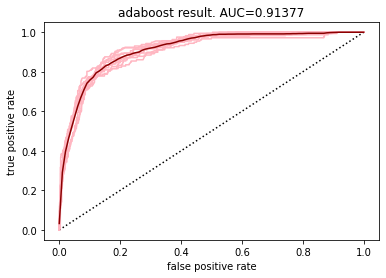

In [202]:
best_n = 16
validate_model(all_data, all_label, AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=best_n),'adaboost')

## confusion matrix
The meaning of the matrix:
    
        [TP][FP]
        [FN][TN]

A "good" confution matrix will show high `True Positive` and `True Negative`, and a low `False Negative` and `False Positive`.  
In our case, the `False` fields are indeed the lowest.  
  
However, the `True Positive` field is quite low, and with  magnitude closer to the `False` fields.  
This is probebly because the propotions of the label are similar ! there are almost 10 times more y=0 than y=1.

To conclude, We think that our confusion matrix shows good results

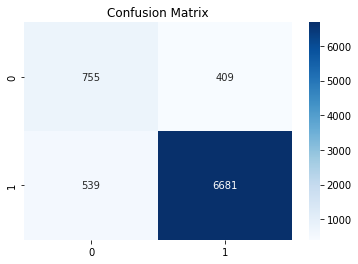

0.9033832508943306

In [203]:
model = AdaBoostClassifier(n_estimators=best_n)
model.fit(X_train, y_train)
preds = model.predict(X_val)
plot_confusion_matrix(y_val, preds)
auc_score(model, X_val, y_val)

### model accuracy:

In [204]:
model.score(all_data, all_label)

0.8877755511022044

## compare train to validation
We can see bellow that the train and validation AUC are simillar
This is a signal for low overfitting. the gap between the validation  
 and test results is traditionally considered a measure for overfitting

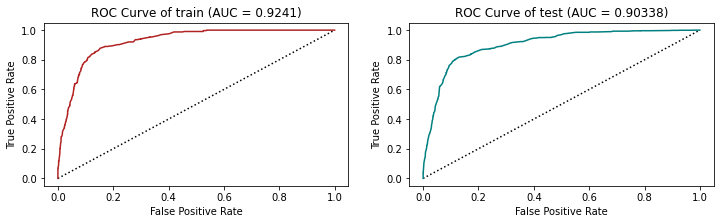

In [205]:
def plot_roc_curves(fprs, tprs, aucs, titels, colors):
    figure, axes = plt.subplots(1,2)
    figure.set_size_inches((12,3))
    for axe, fpr, tpr, auc, title, color in zip(axes, fprs, tprs, aucs, titels, colors):
        baseline = [0,1]
        axe.plot(baseline, baseline, color='black', linestyle=':')
        axe.plot(fpr,tpr,color=color, label=title)
        axe.set_xlabel('False Positive Rate')
        axe.set_ylabel('True Positive Rate')
        axe.set_title(f'ROC Curve of {title} (AUC = {round(auc,5)})')
    plt.show()        

fpr1, tpr1, trsh = roc_curve(y_train, model.predict_proba(X_train)[:,1])
auc1 = auc_score(model, X_train, y_train)

fpr2, tpr2, trsh = roc_curve(y_val, model.predict_proba(X_val)[:,1])
auc2 = auc_score(model, X_val, y_val)

plot_roc_curves([fpr1, fpr2], [tpr1, tpr2], [auc1,auc2], ['train', 'test'], ['firebrick', 'teal'])



## **Feature importance** (fetures with 0 importance filterd out)

Interstingly, all the feature chosen in OLS feature selection is present here. but adaboost chose a banch more.
1. duration in product page makes much since: pepole who spend time in the product's are more likely to buy it.
2. num of product pages is intersing, it might be that 

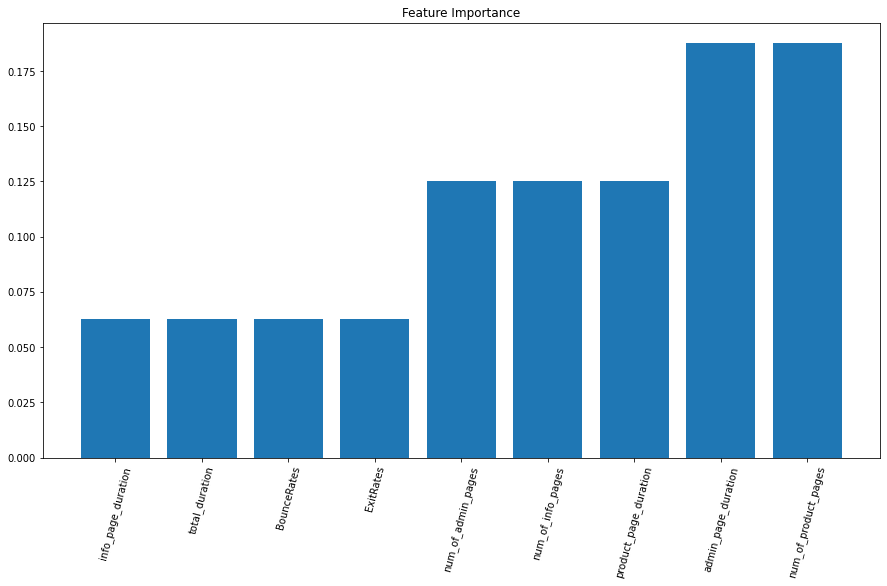

In [206]:
imp_featues = model.feature_importances_[model.feature_importances_>0]
sorted_idx = np.argsort(imp_featues)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(15,8))
plt.bar(pos, imp_featues[sorted_idx], align='center')
plt.xticks(pos, np.array(all_data.columns)[sorted_idx], rotation=75)
plt.title('Feature Importance')
plt.show()

# Prediction on Test Data

In [207]:

predictions = pd.DataFrame(data = model.predict_proba(X_test)[:,1], index=X_test.index)
predictions.rename(columns = {0:'predict_prob'}).to_csv("Submission_group_24.csv",index = True,index_label='id')